# Exploring the ALMA Science Archive with
<img src="images/ALminer_logo_header.jpg" alt="ALminer" align="left" style="width:90%"/>

# Who we are
<img src="images/who_we_are.jpeg" align="left" style="width:75%"/>

# What is ALminer 

Python-based code to effectively <span style="color:#ff7d72"><b>query</b></span>, <span style="color:#ff7d72"><b>analyse</b></span>, and <span style="color:#ff7d72"><b>visualise</b></span> the [**ALMA science archive**](https://almascience.eso.org/asax/) (ASA).
<img src="images/what_is_alminer.jpeg" align="left" style="width:90%"/>

<u>Bonus:</u> <span style="color:#ff7d72"><b>download</b></span> ALMA data products and/or raw data for further image processing.

# Where to find ALminer

 - **Documentation: https://alminer.readthedocs.io/**
 - **GitHub: https://github.com/emerge-erc/ALminer**

# Installation

It's as simple as

<code> > pip install alminer </code>

## Dependencies

* ALminer works in Python>=3.6
* We depend on `numpy`, `matplotlib`, `pandas`, `pyvo`, & `astropy`
* For the data download, we rely on `astroquery`

# Let's get started...

* This presentation is a live Jupyter Notebook so you can follow along with me!
* For the <span style="color:#ff7d72"><b>live presentation</b></span>, go to https://bit.ly/ALminer_I-TRAIN to launch the Jupyter Notebook
* Each cell can be executed by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>
***
* For the <span style="color:#ff7d72"><b>static version</b></span>, follow along at https://bit.ly/ALminer_I-TRAIN_static

# Tutorial outline
<img src="images/talk_flow.jpeg" align="left" style="width:90%"/>

# We first need to import all the relevant packages

In [1]:
import alminer
import pandas
from astropy.io import ascii

# If you were successful in running the notebook so far, we are ready to begin!

<img style="float: right; width:15%" src="images/step1.jpeg">

# 1. Query tools <a name="query"></a>

### Three different methods for querying the ALMA archive:

 * [1.1 - Target name](#target)<br>
 * [1.2 - Target position](#position)<br>
 * [1.3 - ALMA keywords](#keysearch)<br>

### Common features:

* The queries return all possible observations in [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) format
* Default mode searches only for <span style="color:#ff7d72"><b>public data</b></span>
 * to only search for propietary data -> set <span style="color:#63a5f2">*public=False*</span>
 * to search for all data -> set <span style="color:#63a5f2">*public=None*</span>
* By default, a summary of the observations, including a list of <span style="color:#ff7d72"><b>target names</b></span> is printed 
 * to turn this off for large queries -> set <span style="color:#63a5f2">*print_targets=False*</span>

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px;"><b>Function:</b> `target`</span>
<br>
<br>
<img style="float: right; width:20%" src="images/query_name.jpeg">

## 1.1 Query by target name <a name="target"></a>

The target name must be <span style="color:#ff7d72"><b>resolved</b></span> in one of <span style="color:#ff7d72"><b>SIMBAD</b></span>, <span style="color:#ff7d72"><b>NED</b></span>, or <span style="color:#ff7d72"><b>VizieR</b></span>. The query will:
 1. retrieve the coordinates from one of the databases
 2. search for ALMA data within a radius of 1'
   - default search radius can be changed using the <span style="color:#63a5f2">*search_radius*</span> parameter in arcmin

### Example 1.1.1: query two sources by name

In [2]:
myquery = alminer.target(['Orion KL', "AB Aur"])

alminer.target results 
Target = Orion KL
--------------------------------
Number of projects = 32
Number of observations = 86
Number of unique subbands = 269
Total number of subbands = 382
36 target(s) with ALMA data = ['Orion KL', 'Orion H2O maser outburst', 'OrionKL', 'orion-IRc2', 'f3', 'f1', 'f11', 'f13', 'f10', 'f14', 'f15', 'f12', 'Orion_Source_I', 'OMC1_SE', 'orion_kl', 'BN', 'OMC1_NW', 'BN-KL', 'Orion_KL', 'f23', 'OrionKL-SV', 'ONC', 'Orion_BNKL_source_I', 'Orion', 'OMC-1_Region5', 'OMC-1_Region2', 'OMC-1_Region4', '104', 'HC602_HC606_HC608', 'Orion_KL_Field_2_SMA1', 'Orion_KL_Field_1_Orion_Hot_Core', 'Orion_KL_Field_3_North-west_Clump', 'ONC_Mosaic', 'f16', 'Orion-KL', 'ORS-8']
--------------------------------
Target = AB Aur
--------------------------------
Number of projects = 3
Number of observations = 3
Number of unique subbands = 17
Total number of subbands = 17
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Aur', 'AB_Auriga']
--------------------------------


Now let's increase the search radius:

In [3]:
myquery = alminer.target(['Orion KL', "AB Aur"], search_radius=5.0)

alminer.target results 
Target = Orion KL
--------------------------------
Number of projects = 41
Number of observations = 166
Number of unique subbands = 348
Total number of subbands = 780
81 target(s) with ALMA data = ['Orion KL', 'Orion H2O maser outburst', 'OrionField2', 'OrionField1-1', 'OrionField1-2', 'OrionField3', 'OrionKL', 'Orion_Bar', 'orion-IRc2', 'f5', 'f4', 'f3', 'f7', 'f1', 'f8', 'f11', 'f13', 'f10', 'f9', 'f14', 'f15', 'f12', 'Orion_Source_I', 'OMC1_SE', 'orion_kl', 'BN', 'OMC1_NW', 'BN-KL', 'Orion_KL', 'OMC-1S', 'f23', 'f17', 'f16', 'f21', 'f20', 'f22', 'f19', 'f18', 'OrionKL-SV', 'OMC-1', 'Orion_Bar_PDR', 'OrionBullets', 'ONC', 'Orion_BNKL_source_I', 'd203-506', 'Orion', 'OMC-1_Region5', 'OMC-1_Region1', 'OMC-1_Region2', 'OMC-1_Region3', 'OMC-1_Region4', '71', '115', '111', '110', '95', '19', '32', '55', '29', '20', '107', '63', '104', '101', '61', '141-1952_136-1955', 'HC602_HC606_HC608', 'HC672', 'GEMS28', 'Orion_KL_Field_2_SMA1', 'Orion_KL_Field_1_Orion_Hot_Core'

### Example 1.1.2: query a list of objects by name

First create a <span style="color:#ff7d72"><b>catalog</b></span> or a <span style="color:#ff7d72"><b>list</b></span> of object names. In this example, the catalog `Sample_cat.dat` has the following content:

```
 Name     RA      DEC   
AB_Aur  73.9412  30.5511
AK_Sco 253.6867 -36.8886
AS_310 278.3383  -4.9683
AS_470 324.0592  57.3586
AS_477 328.1421  47.2289
```

<u>*Note*</u>: the column that is used is the <u>*Name*</u> column and the coordinates provided by the user are ignored.

In [4]:
mylist = ascii.read("Sample_cat.dat", header_start=0, data_start=1)
myquery = alminer.target(mylist['Name'])

alminer.target results 
Target = AB_Aur
--------------------------------
Number of projects = 3
Number of observations = 3
Number of unique subbands = 17
Total number of subbands = 17
3 target(s) with ALMA data = ['AB_Auriga', 'AB_Aur', 'ab_aurigae']
--------------------------------
Target = AK_Sco
--------------------------------
Number of projects = 3
Number of observations = 3
Number of unique subbands = 12
Total number of subbands = 12
2 target(s) with ALMA data = ['HIP_82747', 'AK_Sco']
--------------------------------
Target = AS_310
--------------------------------
No observations found.
--------------------------------
Target = AS_470
--------------------------------
No observations found.
--------------------------------
Target = AS_477
--------------------------------
No observations found.
--------------------------------


### Example 1.1.3: include proprietary data

In [5]:
myquery = alminer.target(mylist['Name'], public=None)

alminer.target results 
Target = AB_Aur
--------------------------------
Number of projects = 3
Number of observations = 5
Number of unique subbands = 25
Total number of subbands = 25
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Aur', 'AB_Auriga']
--------------------------------
Target = AK_Sco
--------------------------------
Number of projects = 5
Number of observations = 5
Number of unique subbands = 17
Total number of subbands = 20
2 target(s) with ALMA data = ['HIP_82747', 'AK_Sco']
--------------------------------
Target = AS_310
--------------------------------
No observations found.
--------------------------------
Target = AS_470
--------------------------------
No observations found.
--------------------------------
Target = AS_477
--------------------------------
No observations found.
--------------------------------


<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Functions:</b> `conesearch`<br>`catalog`</span>

## 1.2 Query by position <a name="position"></a>

Query the archive by <span style="color:#ff7d72"><b>positions in the sky</b></span> and a <span style="color:#ff7d72"><b>search radius</b></span> around them:

* right ascension (<span style="color:#63a5f2">*ra*</span>) and declinations (<span style="color:#63a5f2">*dec*</span>) must be given in units of **degrees** (ICRS)
 * use the [Astropy coordinates package](https://docs.astropy.org/en/stable/coordinates/index.html) to convert your desired coordinates to degrees
* default search radius is 1 arcmin, but can be changed using the <span style="color:#63a5f2">*search_radius*</span> parameter
<img style="float: right; width:30%" src="images/query_position.jpeg">

### Example 1.2.1: query an object by its coordinates (RA, Dec)

In [6]:
myquery = alminer.conesearch(ra=201.365063, dec=-43.019112, search_radius=10.0)

--------------------------------
Number of projects = 23
Number of observations = 75
Number of unique subbands = 190
Total number of subbands = 305
9 target(s) with ALMA data = ['Centaurus A', 'CenA', 'J1325-430', 'Centaurus_A', 'J1325-4301', 'Centaurus_a', '3FGL_J1325.4-4301', 'Cen_A', 'NGC_5128']
--------------------------------


### Example 1.2.2: query a catalog of objects by their coordinates (RA, Dec)

Let's first import a few rows of a catalog, e.g. the catalog of Spitzer YSOs in Orion from Megeath et al. (2009) (see the file [here](https://github.com/emerge-erc/ALminer/tree/main/notebooks/I-TRAIN/Spitzer_sample.dat)):

In [7]:
Spitzer = ascii.read("Spitzer_sample.dat", header_start=0, data_start=866, data_end=869)

and create a PANDAS DataFrame with the columns <span style="color:#63a5f2">**Name**</span>, <span style="color:#63a5f2">**RAJ2000**</span>, <span style="color:#63a5f2">**DEJ2000**</span>:

In [8]:
mycat = pandas.DataFrame({"Name": Spitzer['Seq'],
                          "RAJ2000": Spitzer["RA2000"],
                          "DEJ2000": Spitzer["DEC2000"]})

Run the query:

In [9]:
myquery = alminer.catalog(mycat, search_radius=1.0)

alminer.catalog results
Target = 866
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['M12_866']
--------------------------------
Target = 867
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['M12_867']
--------------------------------
Target = 868
--------------------------------
Number of projects = 3
Number of observations = 3
Number of unique subbands = 12
Total number of subbands = 12
2 target(s) with ALMA data = ['HOPS-172', 'M12_870']
--------------------------------


<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `keysearch`</span>

## 1.3 Query by ALMA keywords <a name="keysearch"></a>

Query the ALMA archive for <span style="color:#ff7d72"><b>any (string-type) keywords</b></span> defined in ALMA TAP system (see [columns in the ASA](https://almascience.eso.org/aq/) and [this table here](https://alminer.readthedocs.io/en/latest/pages/query_keywords.html)).

Very powerful tool for querying topics of interest, especially when keywords are combined!

**General rules:**
 * spaces are interpreted with 'AND' logic
 <img style="height:100px" src="images/query_word1.jpeg">
 * when multiple values are provided for a given keyword, they are queried using 'OR' logic
 <img style="height:100px" src="images/query_word2.jpeg">
 * when multiple keywords are provided, they are queried using 'AND' logic
 <img style="height:100px" src="images/query_word3.jpeg">

### Example 1.3.1: query a list of ALMA target names that may not be in SIMBAD/NED/VizieR

In [10]:
myquery = alminer.keysearch({'target_name': ['GRB021004','SPT0319-47', 'G345']})

alminer.keysearch results 
--------------------------------
Number of projects = 16
Number of observations = 28
Number of unique subbands = 121
Total number of subbands = 179
10 target(s) with ALMA data = ['GRB021004', 'G345.5', 'SPT0319-47', 'G345.5043+00.3480', 'G345.49+1.47', 'G345.50+0.35', 'G345.6487+0.0089', 'G345.01', 'G345.11', 'G345.0029-0.2241']
--------------------------------


### Example 1.3.2: query a list of ALMA projects by their proposal IDs

In [11]:
myquery = alminer.keysearch({'proposal_id': ['2015.1.00664.S', '2016.1.00204.S']})

alminer.keysearch results 
--------------------------------
Number of projects = 2
Number of observations = 16
Number of unique subbands = 16
Total number of subbands = 64
16 target(s) with ALMA data = ['KMOS3DGS4-11016', 'KMOS3DCOS4-13174', 'KMOS3DU4-32147', 'KMOS3DGS4-24110', 'KMOS3DCOS4-19680', 'KMOS3DU4-22227', 'KMOS3DU4-20547', 'KMOS3DCOS4-15813', 'KMOS3DCOS4-13701', 'KMOS3DGS4-25151', 'KMOS3DU4-34138', 'KMOS3DGS4-27882', 'KMOS3DCOS4-10347', 'KMOS3DCOS4-24763', 'KMOS3DCOS4-15820', 'AK_Sco']
--------------------------------


### Example 1.3.3: query by words in the proposal abstract

Let's do a big query, but avoid printing the long list of target names in the summary by setting the <span style="color:#63a5f2">*print_targets*</span> parameter to <span style="color:#63a5f2">*False*</span>:

In [12]:
myquery = alminer.keysearch({'proposal_abstract': ['high-mass star formation outflow']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 35
Number of observations = 459
Number of unique subbands = 443
Total number of subbands = 3039
Total number of targets with ALMA data = 259
--------------------------------


### Example 1.3.4: query by combination of keywords

Query the ALMA archive for proposals that have the words ('high-mass' <span style="color:#ff7d72">AND</span> 'star' <span style="color:#ff7d72">AND</span> 'formation' <span style="color:#ff7d72">AND</span> 'outflow') <span style="color:#63a5f2">*OR*</span> ('massive' <span style="color:#ff7d72">AND</span> 'star' <span style="color:#ff7d72">AND</span> 'formation') corresponding to the scientific category of 'Galaxy evolution'.

In [13]:
myquery = alminer.keysearch({'proposal_abstract': ['high-mass star formation', 'massive star formation'], 
                             'scientific_category':['Galaxy evolution']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 119
Number of observations = 2056
Number of unique subbands = 2481
Total number of subbands = 8247
Total number of targets with ALMA data = 1376
--------------------------------


### Example 1.3.5: query for full polarization data

In [14]:
myquery = alminer.keysearch({'science_keyword':['disks around low-mass stars'], 
                             'pol_states':['XY', 'YX']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 27
Number of observations = 50
Number of unique subbands = 94
Total number of subbands = 200
Total number of targets with ALMA data = 36
--------------------------------


<img style="float: right; width:25%" src="images/step2.jpeg">

# 2. Filter & explore results <a name="analysis"></a>

The querying functions return a [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) that can be used to further narrow down your search.

### This section presents some examples of how you can further filter and explore the results of your queries:

* [2.1 - Explore the DataFrame](#explore) <br>
* [2.2 - Filter & summarise results](#filter) <br>
* [2.3 - Line coverage](#line_coverage) <br>
* [2.4 - CO, 13CO, C18O lines](#CO_lines) <br>



### Let's create a query that we can use for the rest of the tutorial

In [15]:
observations = alminer.keysearch({'science_keyword':['Galaxy chemistry']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 47
Number of observations = 339
Number of unique subbands = 1162
Total number of subbands = 1361
Total number of targets with ALMA data = 63
--------------------------------


<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `explore`</span>

## 2.1  Explore results <a name="explore"></a>

You can simply <span style="color:#ff7d72"><b>display the DataFrame table</b></span> returned by the query functions using the name you gave it (in this case **observations**), but often there are limits to how many *rows* and *columns* are presented. 

With the <code>alminer.explore</code> function, you can control whether or not you want to 
 * display all rows -> <span style="color:#63a5f2">*allrows=True/False*</span>
 * display all columns -> <span style="color:#63a5f2">*allcols=True/False*</span> 
 
<u>*Note*</u>: By default, only the 18 most useful columns are shown and the number of rows is truncated.

### Example 2.1.1: View the queried observations as a table (shortened)

In [16]:
alminer.explore(observations)

Obs    project_code ALMA_source_name     RAJ2000    DEJ2000  ang_res_arcsec  min_freq_GHz  ...  vel_res_kms  LAS_arcsec  FoV_arcsec  cont_sens_bandwidth  line_sens_10kms  line_sens_native                 MOUS_id
0        1  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694           1.167        252.85  ...        1.149       8.943      23.564               79.299          1675.07            112.74  uid://A002/X303d22/X7b
1        2  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694           1.167        239.50  ...        1.213       8.943      23.564               79.299          1708.54            111.94  uid://A002/X303d22/X7b
2        3  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.442        290.68  ...        1.001       4.104      19.504               68.197          1903.65            137.16  uid://A002/X36d874/X7e
3        4  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           1.331         93.07  ...        3.083      12.937      58.774               29.824          1440.54             59.16  uid://A002/X36d874/X80
4        5  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           1.331        105.07  ...        2.737      12.937      58.774               29.824          1370.09             59.71  uid://A002/X36d874/X80
5        6  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           1.331         91.20  ...        3.145      12.937      58.774               29.824          1500.60             61.02  uid://A002/X36d874/X80
6        7  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           1.331        103.20  ...        2.786      12.937      58.774               29.824          1381.77             59.69  uid://A002/X36d874/X80
7        8  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.455        283.51  ...        1.026       3.448      20.113               60.429          1673.64            119.28  uid://A002/X36d874/X7a
8        9  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.455        281.64  ...        1.033       3.448      20.113               60.429          1677.23            119.14  uid://A002/X36d874/X7a
9       10  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.563        259.58  ...        1.120       5.088      23.118               74.597          2278.21            154.60  uid://A002/X36d874/X7c
10      11  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.563        256.63  ...        1.132       5.088      23.118               74.597          2189.73            147.77  uid://A002/X36d874/X7c
11      12  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.563        242.31  ...        1.199       5.088      23.118               74.597          2229.83            146.24  uid://A002/X36d874/X7c
12      13  2011.0.00405.S      PKS1830-211  278.416330 -21.061080           0.563        244.13  ...        1.190       5.088      23.118               74.597          2229.45            146.80  uid://A002/X36d874/X7c
...    ...             ...              ...         ...        ...             ...           ...  ...          ...         ...         ...                  ...              ...               ...                     ...
1348  1349  2019.1.00130.S          NGC1068   40.669879  -0.013289           2.247         96.60  ...        5.902      21.118      55.719               21.996          1015.52             42.52  uid://A001/X1465/X3894
1349  1350  2019.1.00130.S          NGC4945  196.363663 -49.467900           2.309         96.80  ...        5.890      22.321      55.608               18.936           984.33             41.26  uid://A001/X1465/X388c
1350  1351  2019.1.00130.S          NGC4945  196.363663 -49.467900           2.309        108.87  ...        5.338      22.321      55.608               18.936           799.25             35.19  uid://A001/X1465/X388c
1351  1352  2019.1.00130.S          NGC4945  196.363663 -49.46790

### Example 2.1.2: View the queried observations as a table and show all columns

In [17]:
alminer.explore(observations, allcols=True, allrows=False)

Obs    project_code ALMA_source_name     RAJ2000    DEJ2000  ...  qa2_passed                                      bib_reference                                 science_keyword  scientific_category             lastModified
0        1  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694  ...           T  2012A&A...542L..34N 2014ApJ...795....5O 2016A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
1        2  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694  ...           T  2012A&A...542L..34N 2014ApJ...795....5O 2016A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
2        3  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
3        4  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
4        5  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
5        6  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
6        7  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
7        8  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
8        9  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
9       10  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
10      11  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
11      12  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
12      13  2011.0.00405.S      PKS1830-211  278.416330 -21.061080  ...           T  2013A&A...558A.123M 2013PhRvL.111w1101B 2014A&...  Galaxy structure & evolution, Galaxy chemistry     Galaxy evolution  2021-09-30T16:34:41.133
...    ...             ...              ...         ...        ...  ...         ...                                                ...                                             ...                  ...                      ...
1348  1349  2019.1.00130.S          NGC1068   40.669879  -0.013289  ...           T                                                       Starbursts, star formation, Galaxy chemistry      Active galaxies  2021-09-30T16:34:41.133
1349  1350  2019.1.00130.S          NGC4945  196.363663 -49.467900  ...           T                                                       Starbursts, star formation, Galaxy chemistry      Active galaxies  2021-09-30T16:34:41.133
1350  1351  2019.1.00130.S          NGC4945  196.363663 -49.467900  ...           T                               

</u>*Note*</u>: You can also set <span style="color:#63a5f2">*allrows=True*</span> to see all rows in the table but this may be slow for very large queries.

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Functions:</b> `get_info`<br>`summary`</span>

## 2.2 Filter & summrise results <a name="filter"></a>

The search results can be further narrowed down by using [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) functions (see also this [introduction to data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe)).

For example, you can:
 * use `your_query.columns` to get a list of all columns in the DataFrame
 * get the description and units of any column in the DataFrame using the function `alminer.get_info('column_name')`
 * filter the query results further
 * use `alminer.summary` function to print a summary of the observations after filtering 

In [18]:
observations.columns

Index(['Obs', 'project_code', 'ALMA_source_name', 'RAJ2000', 'DEJ2000',
       'ang_res_arcsec', 'min_freq_GHz', 'max_freq_GHz', 'central_freq_GHz',
       'bandwidth_GHz', 'freq_res_kHz', 'vel_res_kms', 'LAS_arcsec',
       'FoV_arcsec', 'cont_sens_bandwidth', 'line_sens_10kms',
       'line_sens_native', 'MOUS_id', 'access_url', 'access_format',
       'proposal_id', 'data_rights', 'gal_longitude', 'gal_latitude',
       'obs_publisher_did', 'obs_collection', 'facility_name',
       'instrument_name', 'obs_id', 'dataproduct_type', 'calib_level',
       'target_name', 's_ra', 's_dec', 's_fov', 's_region', 's_resolution',
       't_min', 't_max', 't_exptime', 't_resolution', 'em_min', 'em_max',
       'em_res_power', 'pol_states', 'o_ucd', 'band_list', 'em_resolution',
       'authors', 'pub_abstract', 'publication_year', 'proposal_abstract',
       'schedblock_name', 'proposal_authors', 'sensitivity_10kms',
       'cont_sensitivity_bandwidth', 'pwv', 'group_ous_uid', 'member_ous_uid',

Now let's check what the description and units of *ang_res_arcsec* column are:

In [19]:
alminer.get_info('ang_res_arcsec')

--------------------------------
Column: ang_res_arcsec
--------------------------------
Description: typical spatial resolution
Units: arcsec
--------------------------------


### Example 2.2.1: simple selection - observations with angular resolutions < 0.5"

In [20]:
selected = observations[observations['ang_res_arcsec'] < 0.5]

and print the summary:

In [21]:
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 23
Number of observations = 121
Number of unique subbands = 367
Total number of subbands = 484
Total number of targets with ALMA data = 41
--------------------------------


### Example 2.2.2: multiple selections - observations with angular resolution < 0.5" & velocity resolution < 1 km/s

In [22]:
selected = observations[(observations['ang_res_arcsec'] < 0.5) & 
                        (observations['vel_res_kms'] < 1.0)]
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 9
Number of observations = 48
Number of unique subbands = 65
Total number of subbands = 109
Total number of targets with ALMA data = 26
--------------------------------


### Example 2.2.3: observations containing a given frequency

In [23]:
freq = 220.5  
selected = observations[(observations["min_freq_GHz"] < freq) & 
                        (observations["max_freq_GHz"] > freq)]
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 6
Number of observations = 7
Number of unique subbands = 7
Total number of subbands = 7
Total number of targets with ALMA data = 5
--------------------------------


<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `line_coverage`</span>

## 2.3 Line coverage <a name="line_coverage"></a>

The `alminer.line_coverage` function determines <span style="color:#ff7d72"><b>how many targets were observed at a given frequency</b></span> with the option to include a <span style="color:#ff7d72"><b>redshift</b></span> for the line of interest to be taken into account. 

### Important to note:
 * line frequencies should be given in GHz -> <span style="color:#63a5f2">*line_freq*</span> parameter
 * redshift is by default assumed to be 0 -> <span style="color:#63a5f2">*z*</span> parameter
 * the <span style="color:#63a5f2">*line_name*</span> parameter is the user's defined name for the frquency provided

### Example 2.3.1: search whether a given frequency is covered in the observations


In [24]:
myline_obs = alminer.line_coverage(observations, 
                                   line_freq=220.5, 
                                   z=0, 
                                   line_name="My favourite line", 
                                   print_targets=True)

--------------------------------
Summary of 'My favourite line' observations at 220.5 GHz
--------------------------------
Number of projects = 6
Number of observations = 7
Number of unique subbands = 7
Total number of subbands = 7
5 target(s) with ALMA data = ['Arp220', 'ngc_3256', 'IRAS_13120-5453', 'ngc253', 'NGC_253']
--------------------------------


### Example 2.3.2: search whether a given frequency is observed for a target at a given redshift 

In [25]:
myline_obs = alminer.line_coverage(observations, 
                                   line_freq=400.0, 
                                   z=0.5, 
                                   line_name="My favourite line", 
                                   print_targets=True)

--------------------------------
Summary of 'My favourite line' observations at 400.0 GHz (266.667 GHz at z=0.5)
--------------------------------
Number of projects = 8
Number of observations = 10
Number of unique subbands = 11
Total number of subbands = 11
6 target(s) with ALMA data = ['ngc4418', 'Arp220', 'ngc_3256', 'circinus', 'ngc4945', 'ngc253']
--------------------------------


<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `CO_lines`</span>

## 2.4 Coverage of CO, <sup>13</sup>CO, and C<sup>18</sup>O lines <a name="CO_lines"></a>

The `alminer.CO_lines` function determines <span style="color:#ff7d72"><b>how many CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed</b></span> in the provided DataFrame and returns a DataFrame containing all observations of these transitions.

### Example 2.4.1: search whether any CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the query results

In [26]:
CO_obs = alminer.CO_lines(observations, print_targets=False)

--------------------------------
Summary of 'CO (1-0)' observations at 115.271 GHz
--------------------------------
Number of projects = 4
Number of observations = 5
Number of unique subbands = 4
Total number of subbands = 5
Total number of targets with ALMA data = 3
--------------------------------
--------------------------------
Summary of 'CO (2-1)' observations at 230.538 GHz
--------------------------------
Number of projects = 10
Number of observations = 13
Number of unique subbands = 13
Total number of subbands = 13
Total number of targets with ALMA data = 8
--------------------------------
--------------------------------
Summary of 'CO (3-2)' observations at 345.796 GHz
--------------------------------
Number of projects = 3
Number of observations = 5
Number of unique subbands = 5
Total number of subbands = 5
Total number of targets with ALMA data = 4
--------------------------------
--------------------------------
Summary of 'CO (4-3)' observations at 461.041 GHz
----------

### Example 2.4.2: search whether any redshifted CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the query results

In [27]:
CO_obs = alminer.CO_lines(observations, z=1, print_targets=False)

--------------------------------
Summary of 'CO (1-0)' observations at 115.2712018 GHz (57.636 GHz at z=1)
--------------------------------
No observations found.
--------------------------------
--------------------------------
Summary of 'CO (2-1)' observations at 230.538 GHz (115.269 GHz at z=1)
--------------------------------
Number of projects = 4
Number of observations = 5
Number of unique subbands = 4
Total number of subbands = 5
Total number of targets with ALMA data = 3
--------------------------------
--------------------------------
Summary of 'CO (3-2)' observations at 345.7959899 GHz (172.898 GHz at z=1)
--------------------------------
Number of projects = 2
Number of observations = 3
Number of unique subbands = 3
Total number of subbands = 3
Total number of targets with ALMA data = 2
--------------------------------
--------------------------------
Summary of 'CO (4-3)' observations at 461.0407682 GHz (230.52 GHz at z=1)
--------------------------------
Number of projec

<img style="float: right; width:25%" src="images/step3.jpeg">


# 3. Plot results <a name="results"></a>

### This section introduces all the plotting functions that help visualise the queried observations:<br>

* [3.1 - Plot an overview of the observations](#plot_overview)<br>
* [3.2 - Plot an overview of a given line in the observations](#plot_line_overview)<br>
* [3.3 - Plot observed frequencies in each band](#plot_bands)<br>
* [3.4 - Plot observations in each band](#plot_observations)<br>
* [3.5 - Sky distribution](#plot_sky)<br>

### Common features:

Most of the plotting functions have the option to:

 * mark frequencies of CO, <sup>13</sup>CO, and C<sup>18</sup>O lines by toggling <span style="color:#63a5f2">*mark_CO=True*</span>
 * mark a list of frequencies -> <span style="color:#63a5f2">*mark_freq*</span> parameter
 * provide a redshift by which by the marked frequencies can be shifted -> <span style="color:#63a5f2">*z*</span> parameter
 * save the plot in PDF format -> set the <span style="color:#63a5f2">*savefig*</span> parameter to the desired filename
 * avoid displaying the plot (for example to create and save plots in a loop) -> set <span style="color:#63a5f2">*showfig=False*</span>

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `plot_overview`</span>

## 3.1 Plot an overview of the observations <a name="plot_overview"></a>

The `alminer.plot_overview` function plots a summary of the <span style="color:#ff7d72"><b>observed frequencies</b></span>, <span style="color:#ff7d72"><b>angular resolution</b></span>, <span style="color:#ff7d72"><b>largest angular scales (LAS)</b></span>, and <span style="color:#ff7d72"><b>frequency & velocity resolutions</b></span>.

### Example 3.1.1: plot an overview of the observations and save the figure

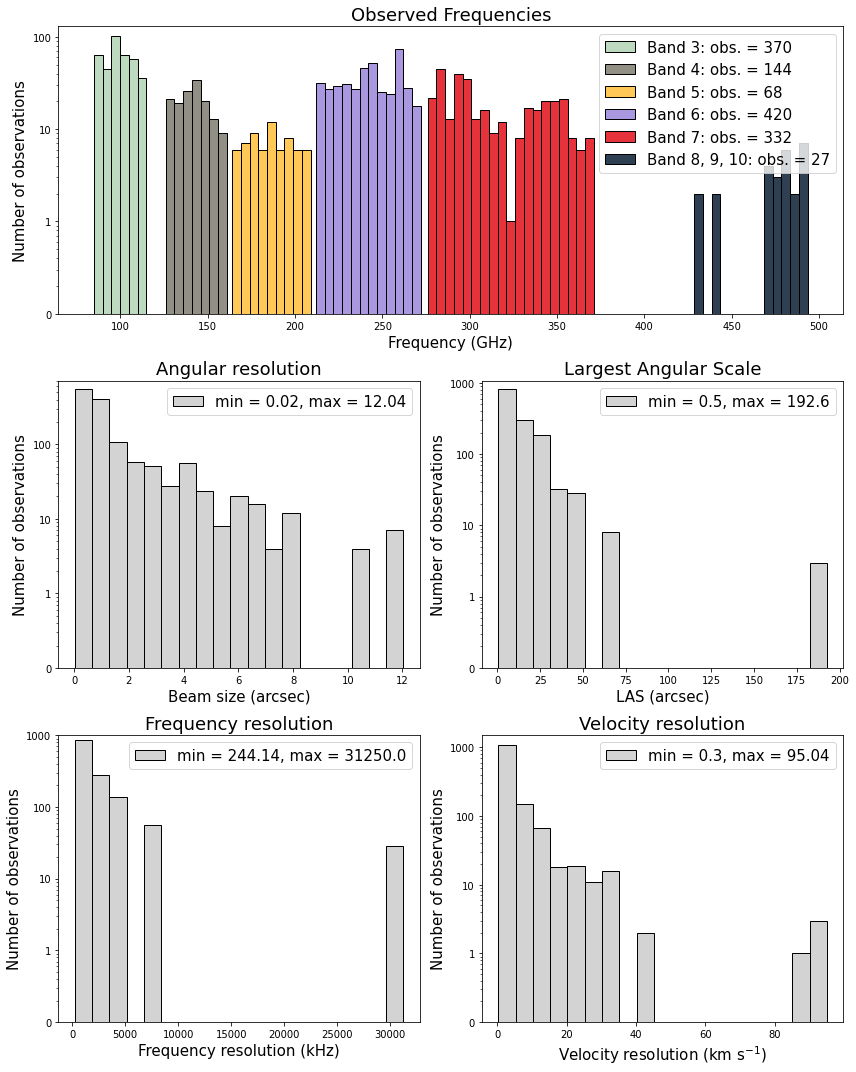

In [28]:
alminer.plot_overview(observations, savefig='alma_galaxy_chemistry')

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `plot_line_overview`</span>
<br>

## 3.2 Plot an overview of a given line in the observations <a name="plot_line_overview"></a>

The `alminer.plot_line_overview` creates the same plot as the `alminer.plot_line_overview` function but it <span style="color:#ff7d72"><b>highlights observations of a give frequency</b></span> specified by the user (redshifted if the <span style="color:#63a5f2">*z*</span> parameter is set). 

### Example 3.2.1: plot an overview of the observations and highlight observations at a particular frequency

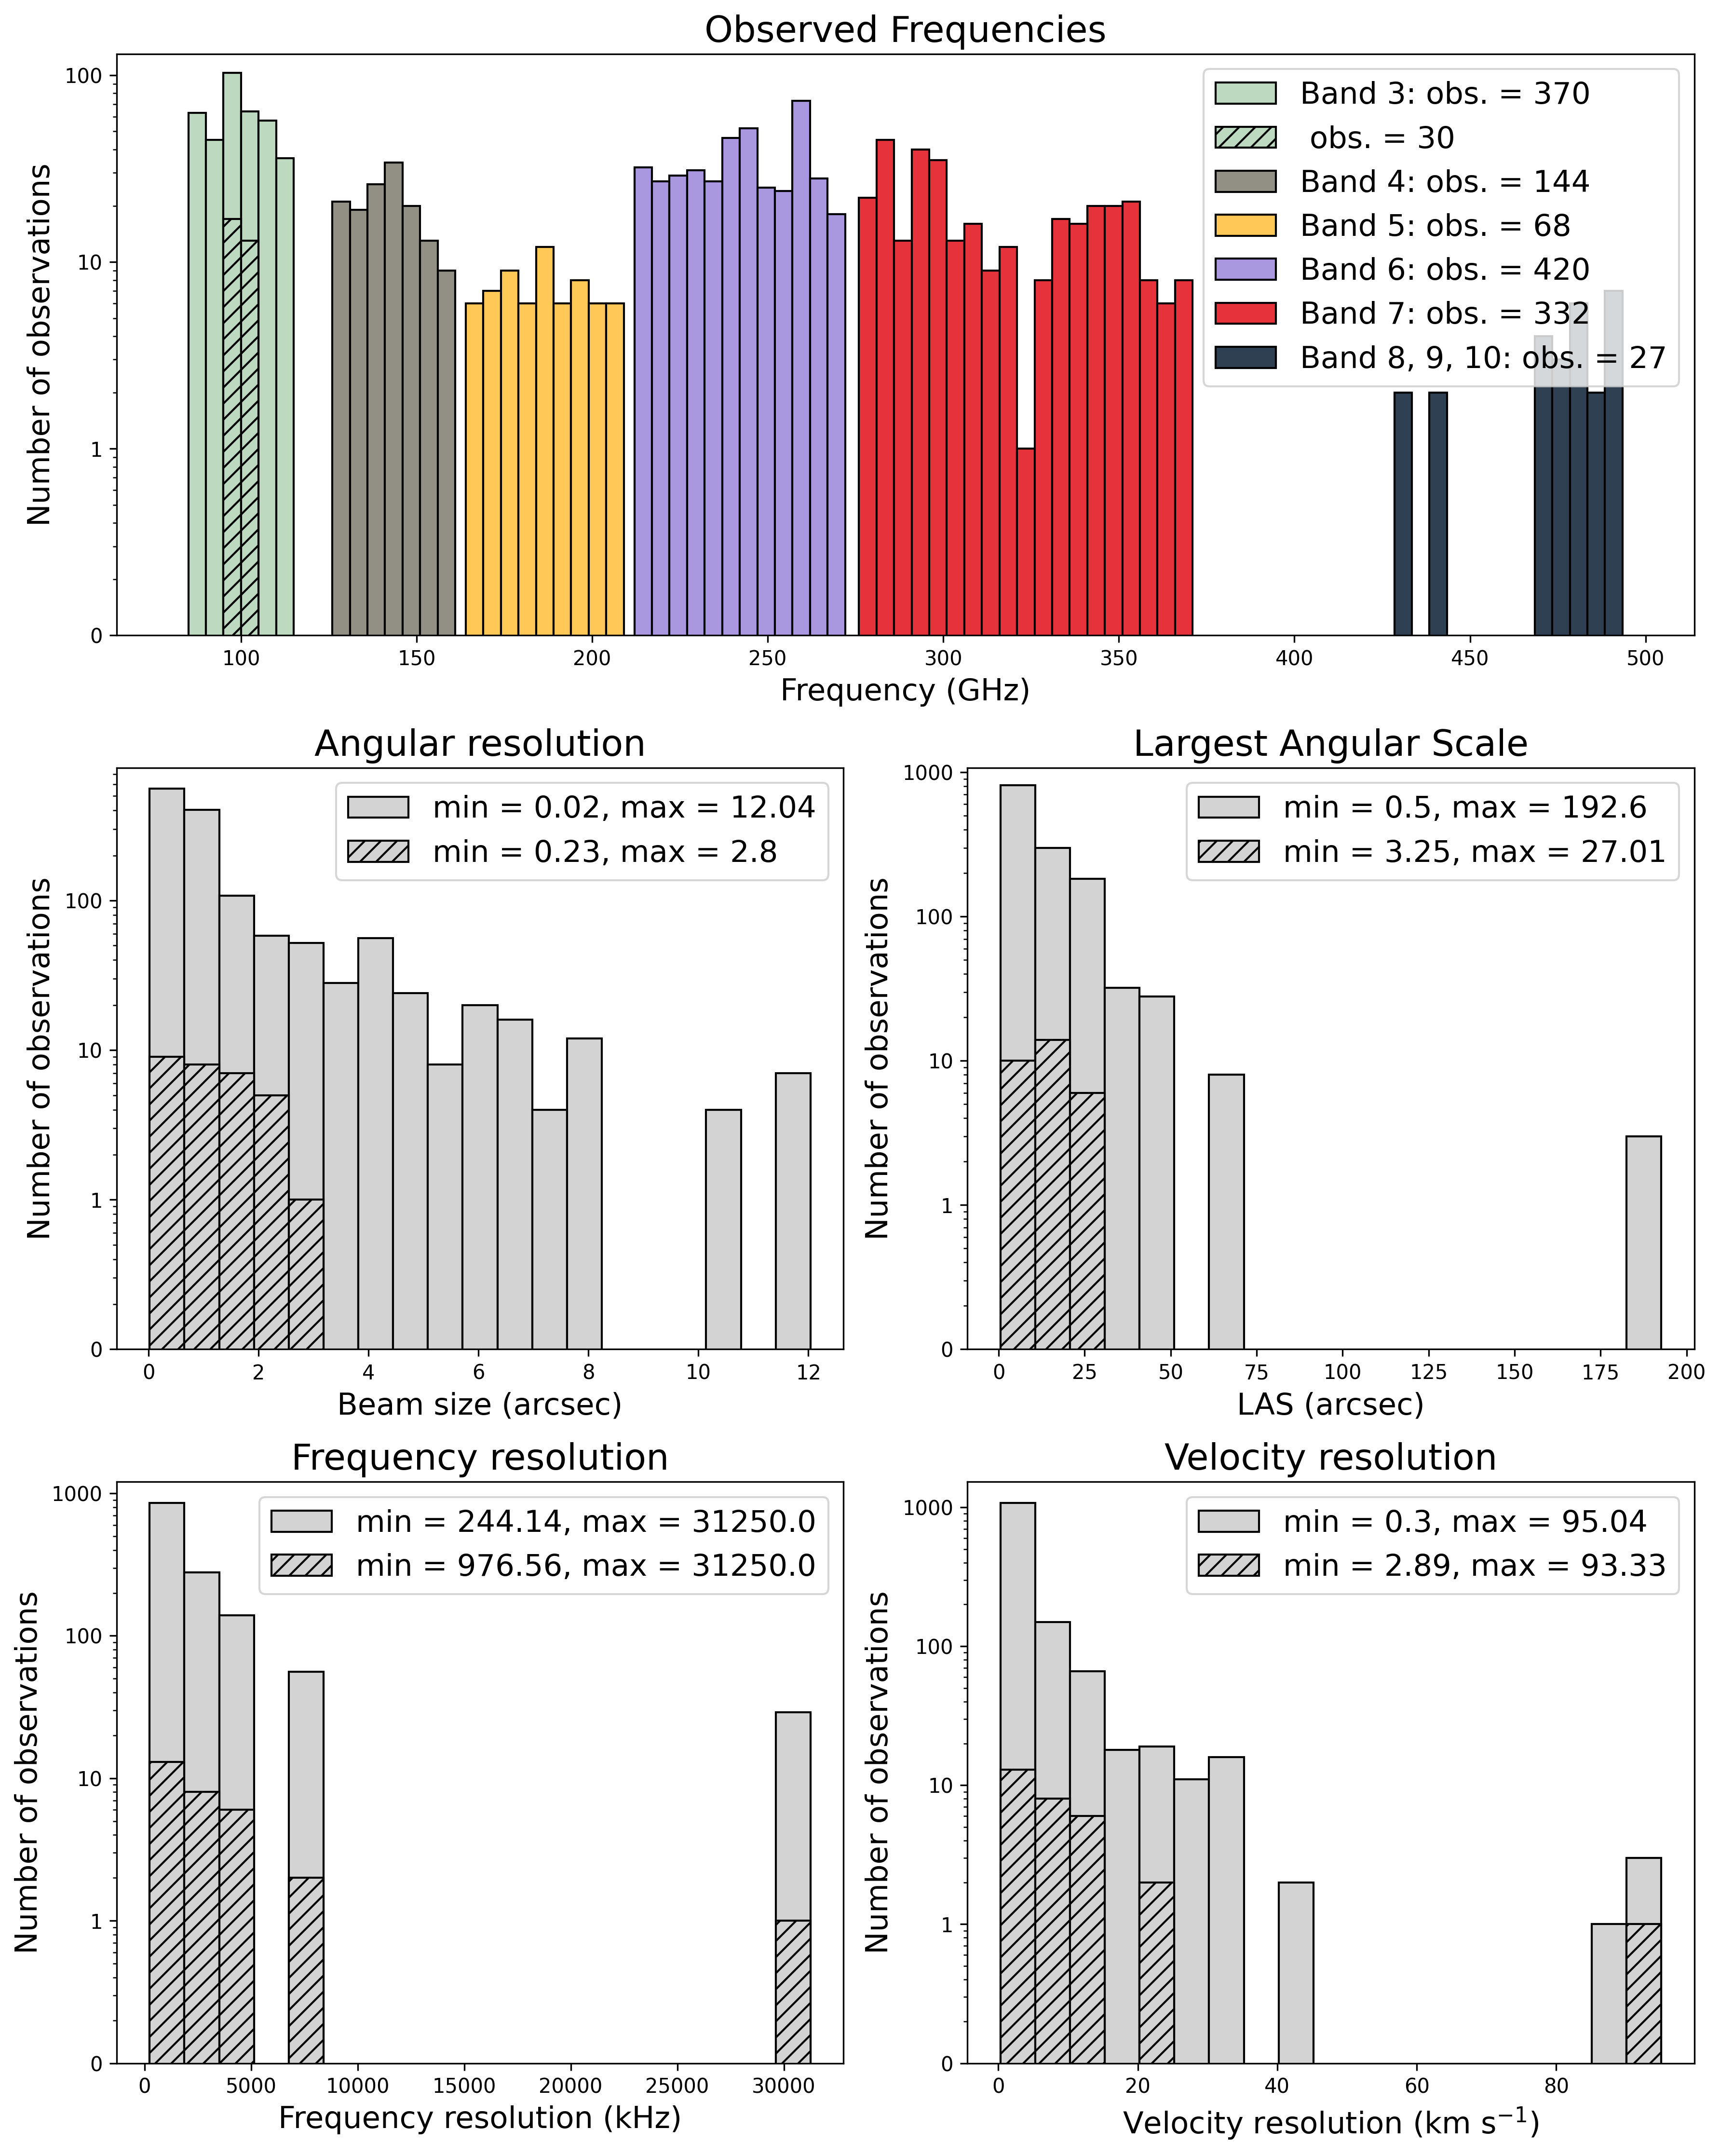

In [29]:
alminer.plot_line_overview(observations, line_freq=100.0)

### Example 3.2.2: plot an overview of the observations and highlight observations at a redshifted frequency

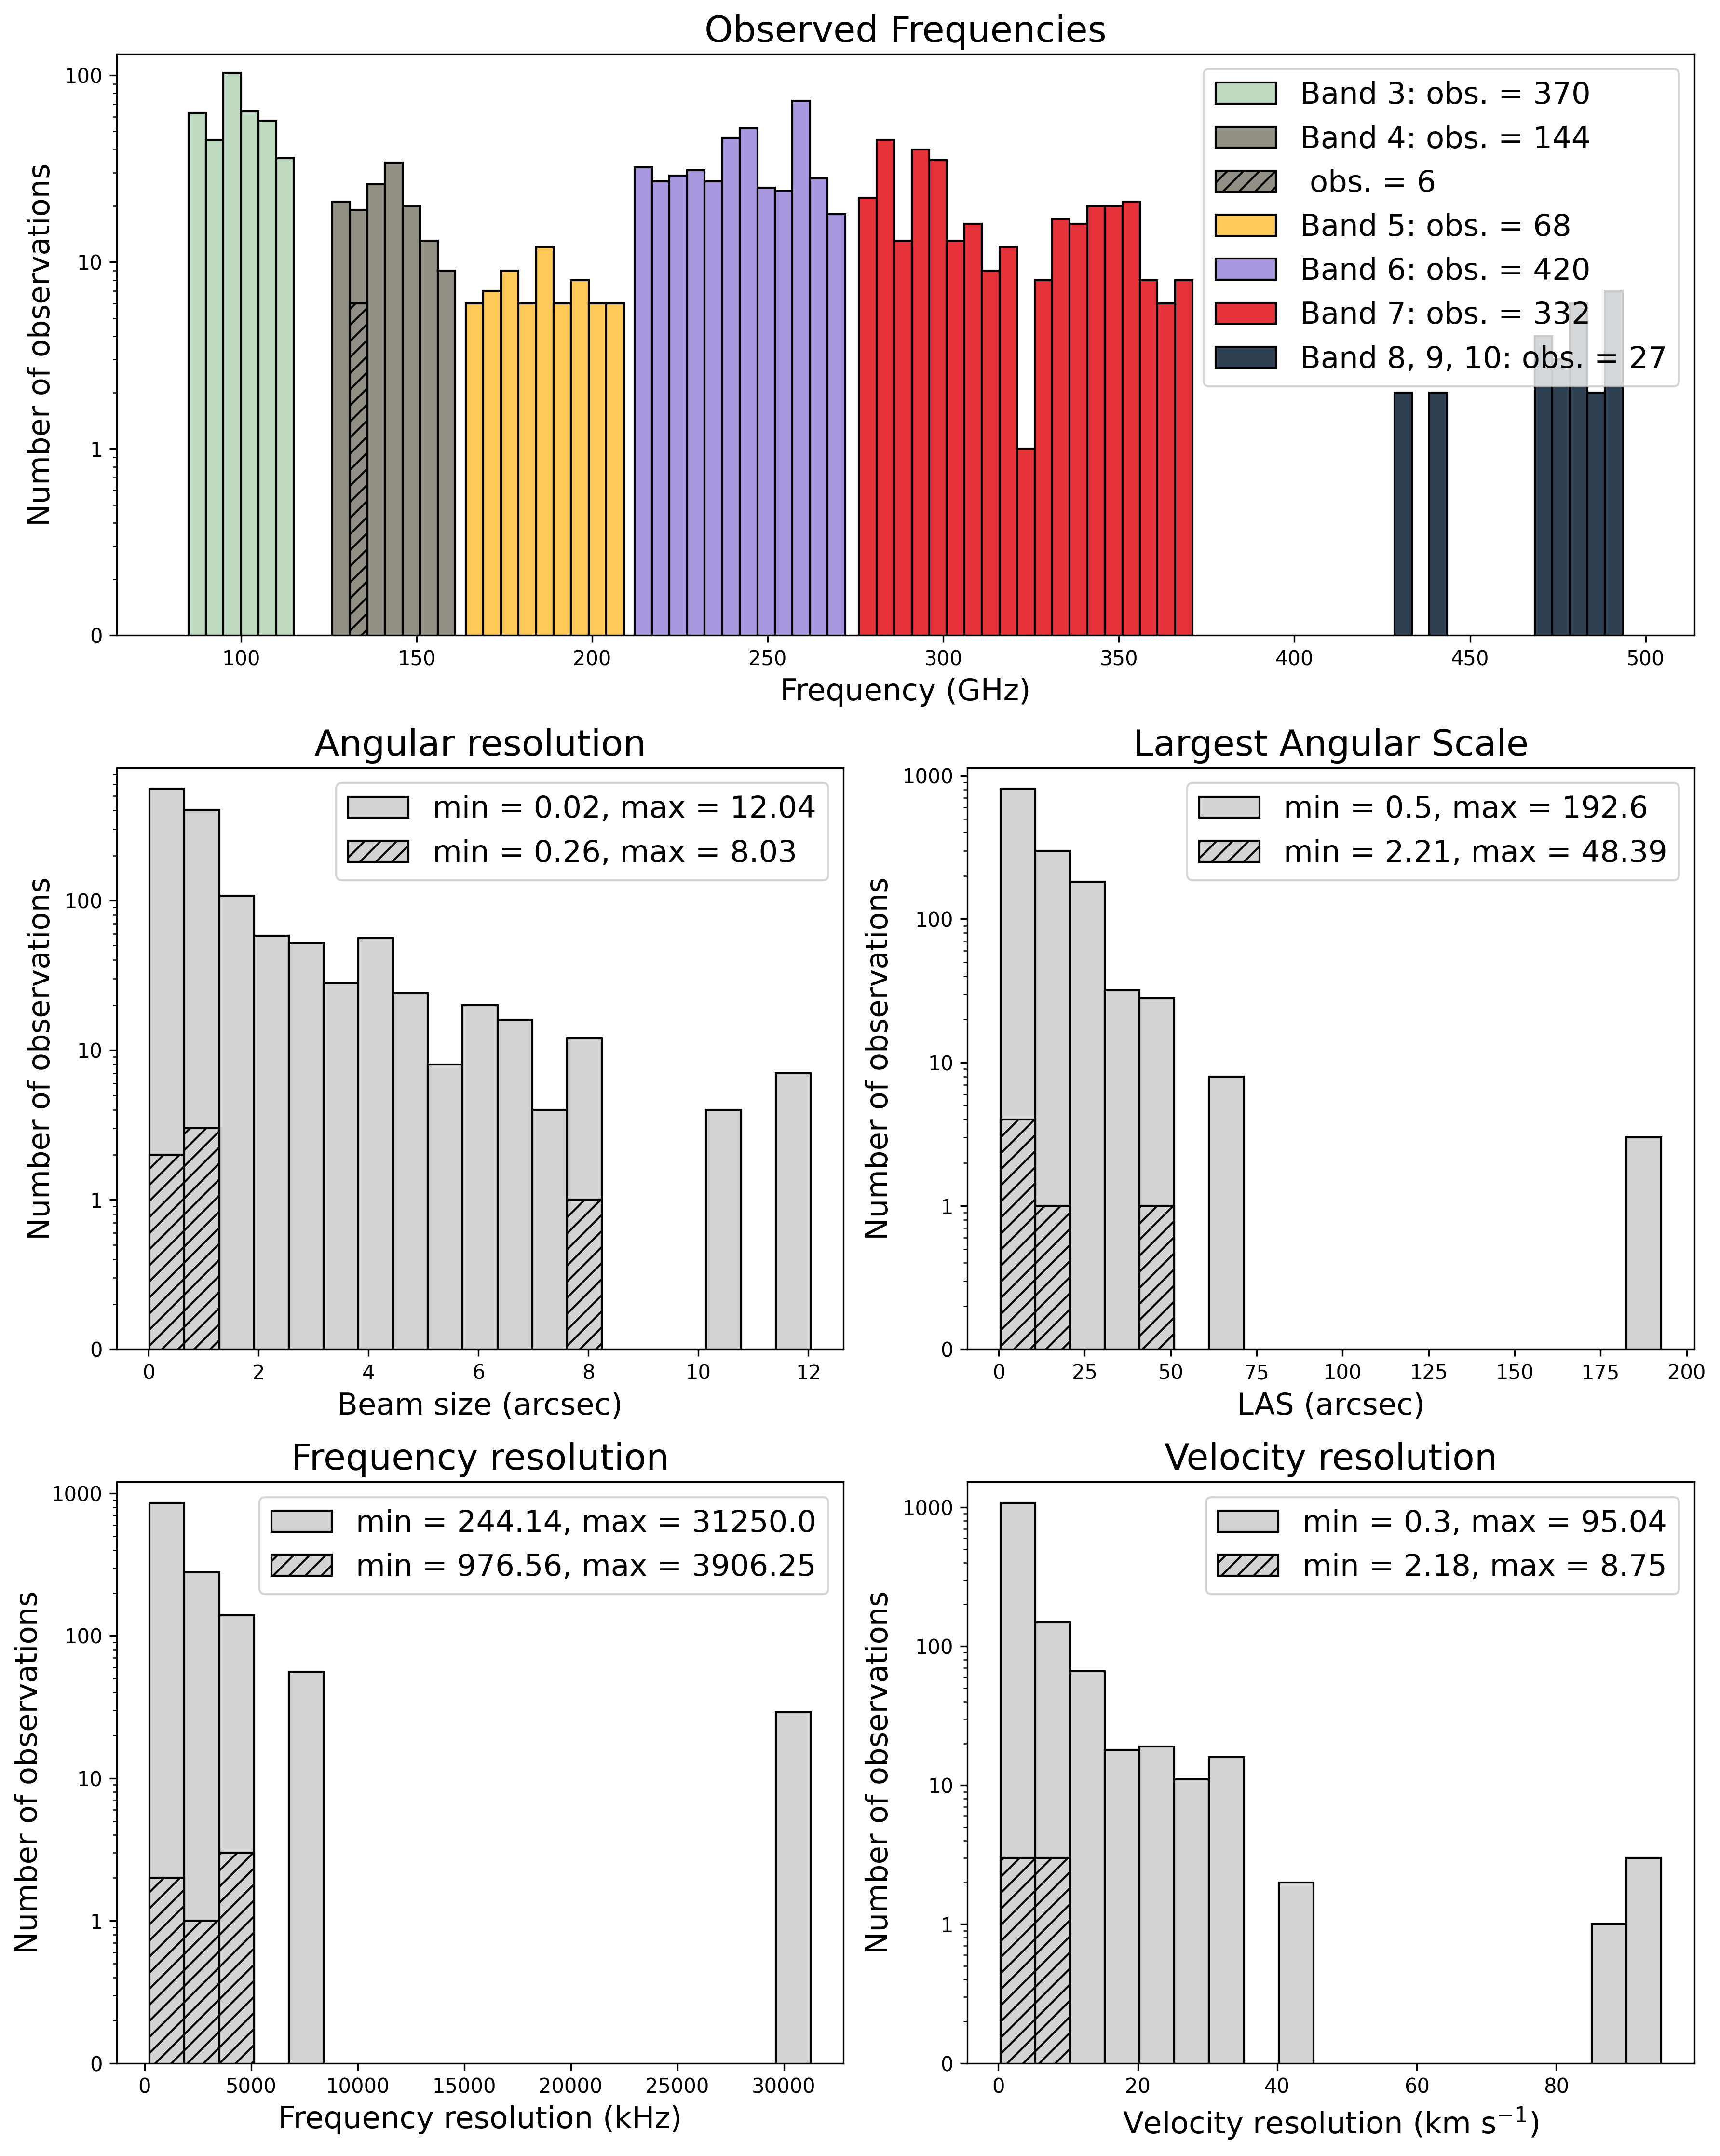

In [30]:
alminer.plot_line_overview(observations, line_freq=400.0, z=2)


## 3.3 Plot observed frequencies in each band <a name="plot_bands"></a>

The `alminer.plot_bands` function creates detailed plots of <span style="color:#ff7d72"><b>observed frequencies in each band</b></span>.

### Example 3.3.1: plot observed frequencies in each band and mark redshifted CO lines

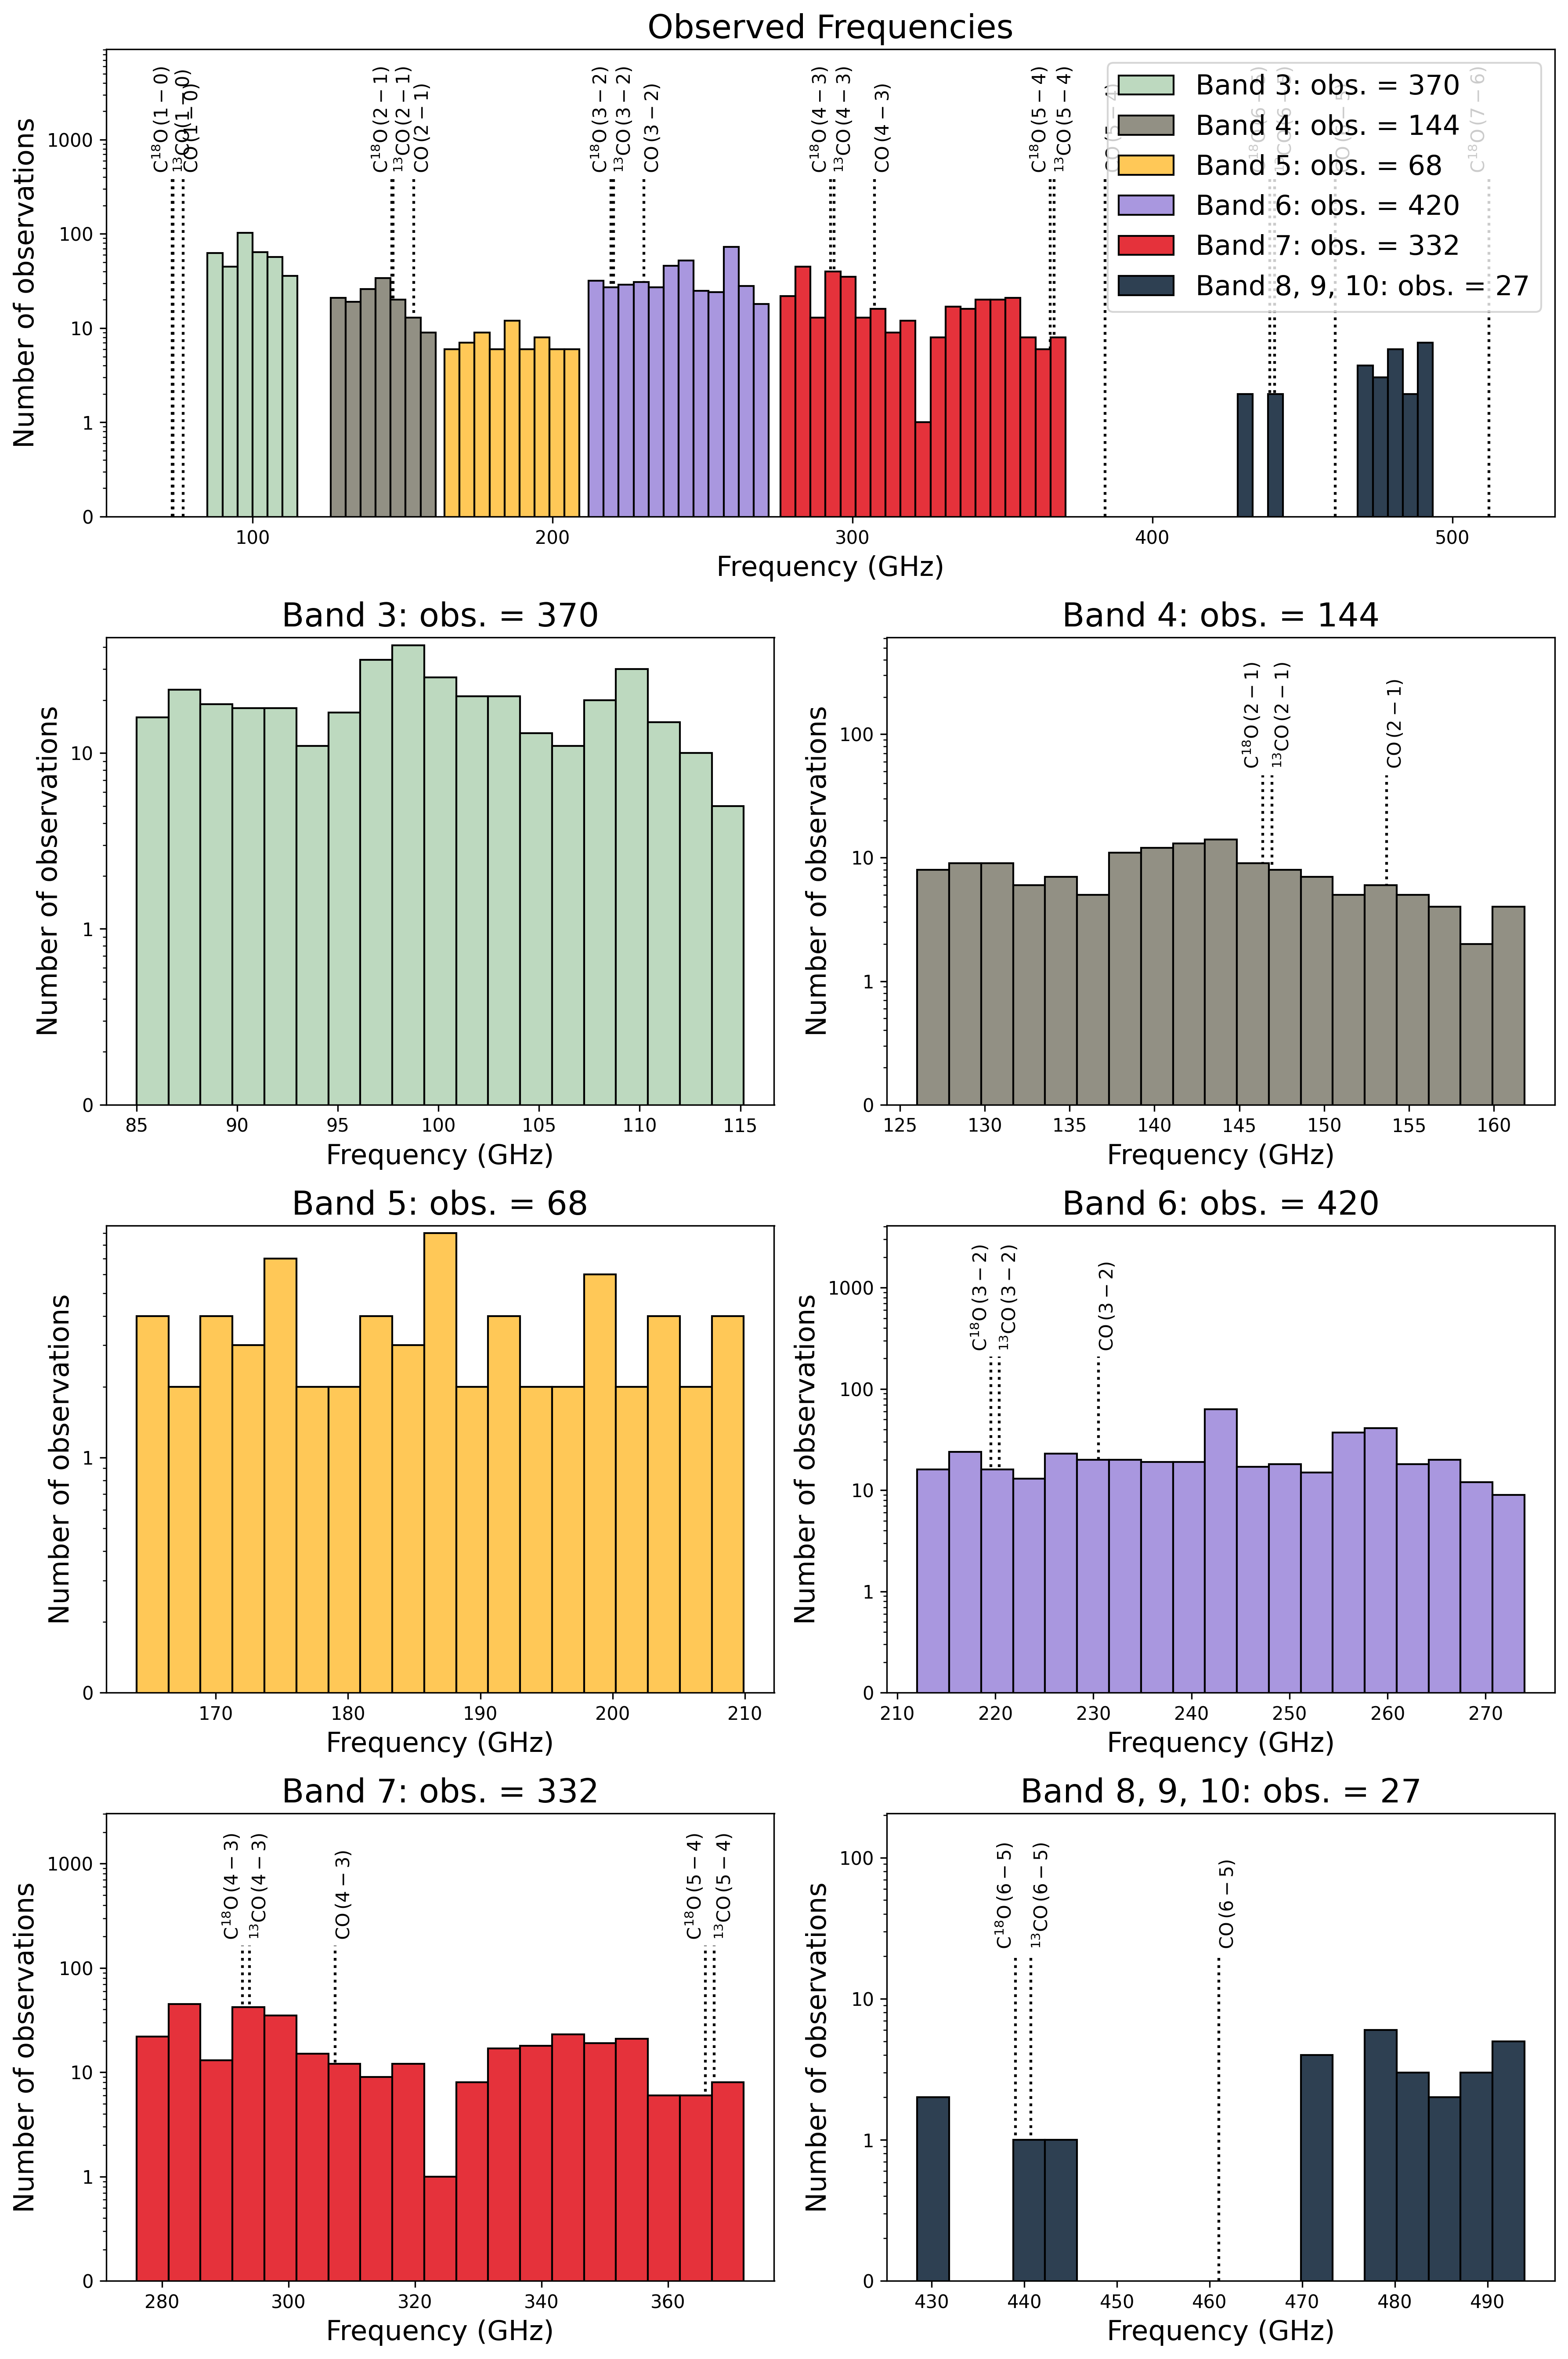

In [31]:
alminer.plot_bands(observations, mark_CO=True, z=0.5)

### Example 3.3.2: plot observed frequencies in each band and mark frequencies of choice

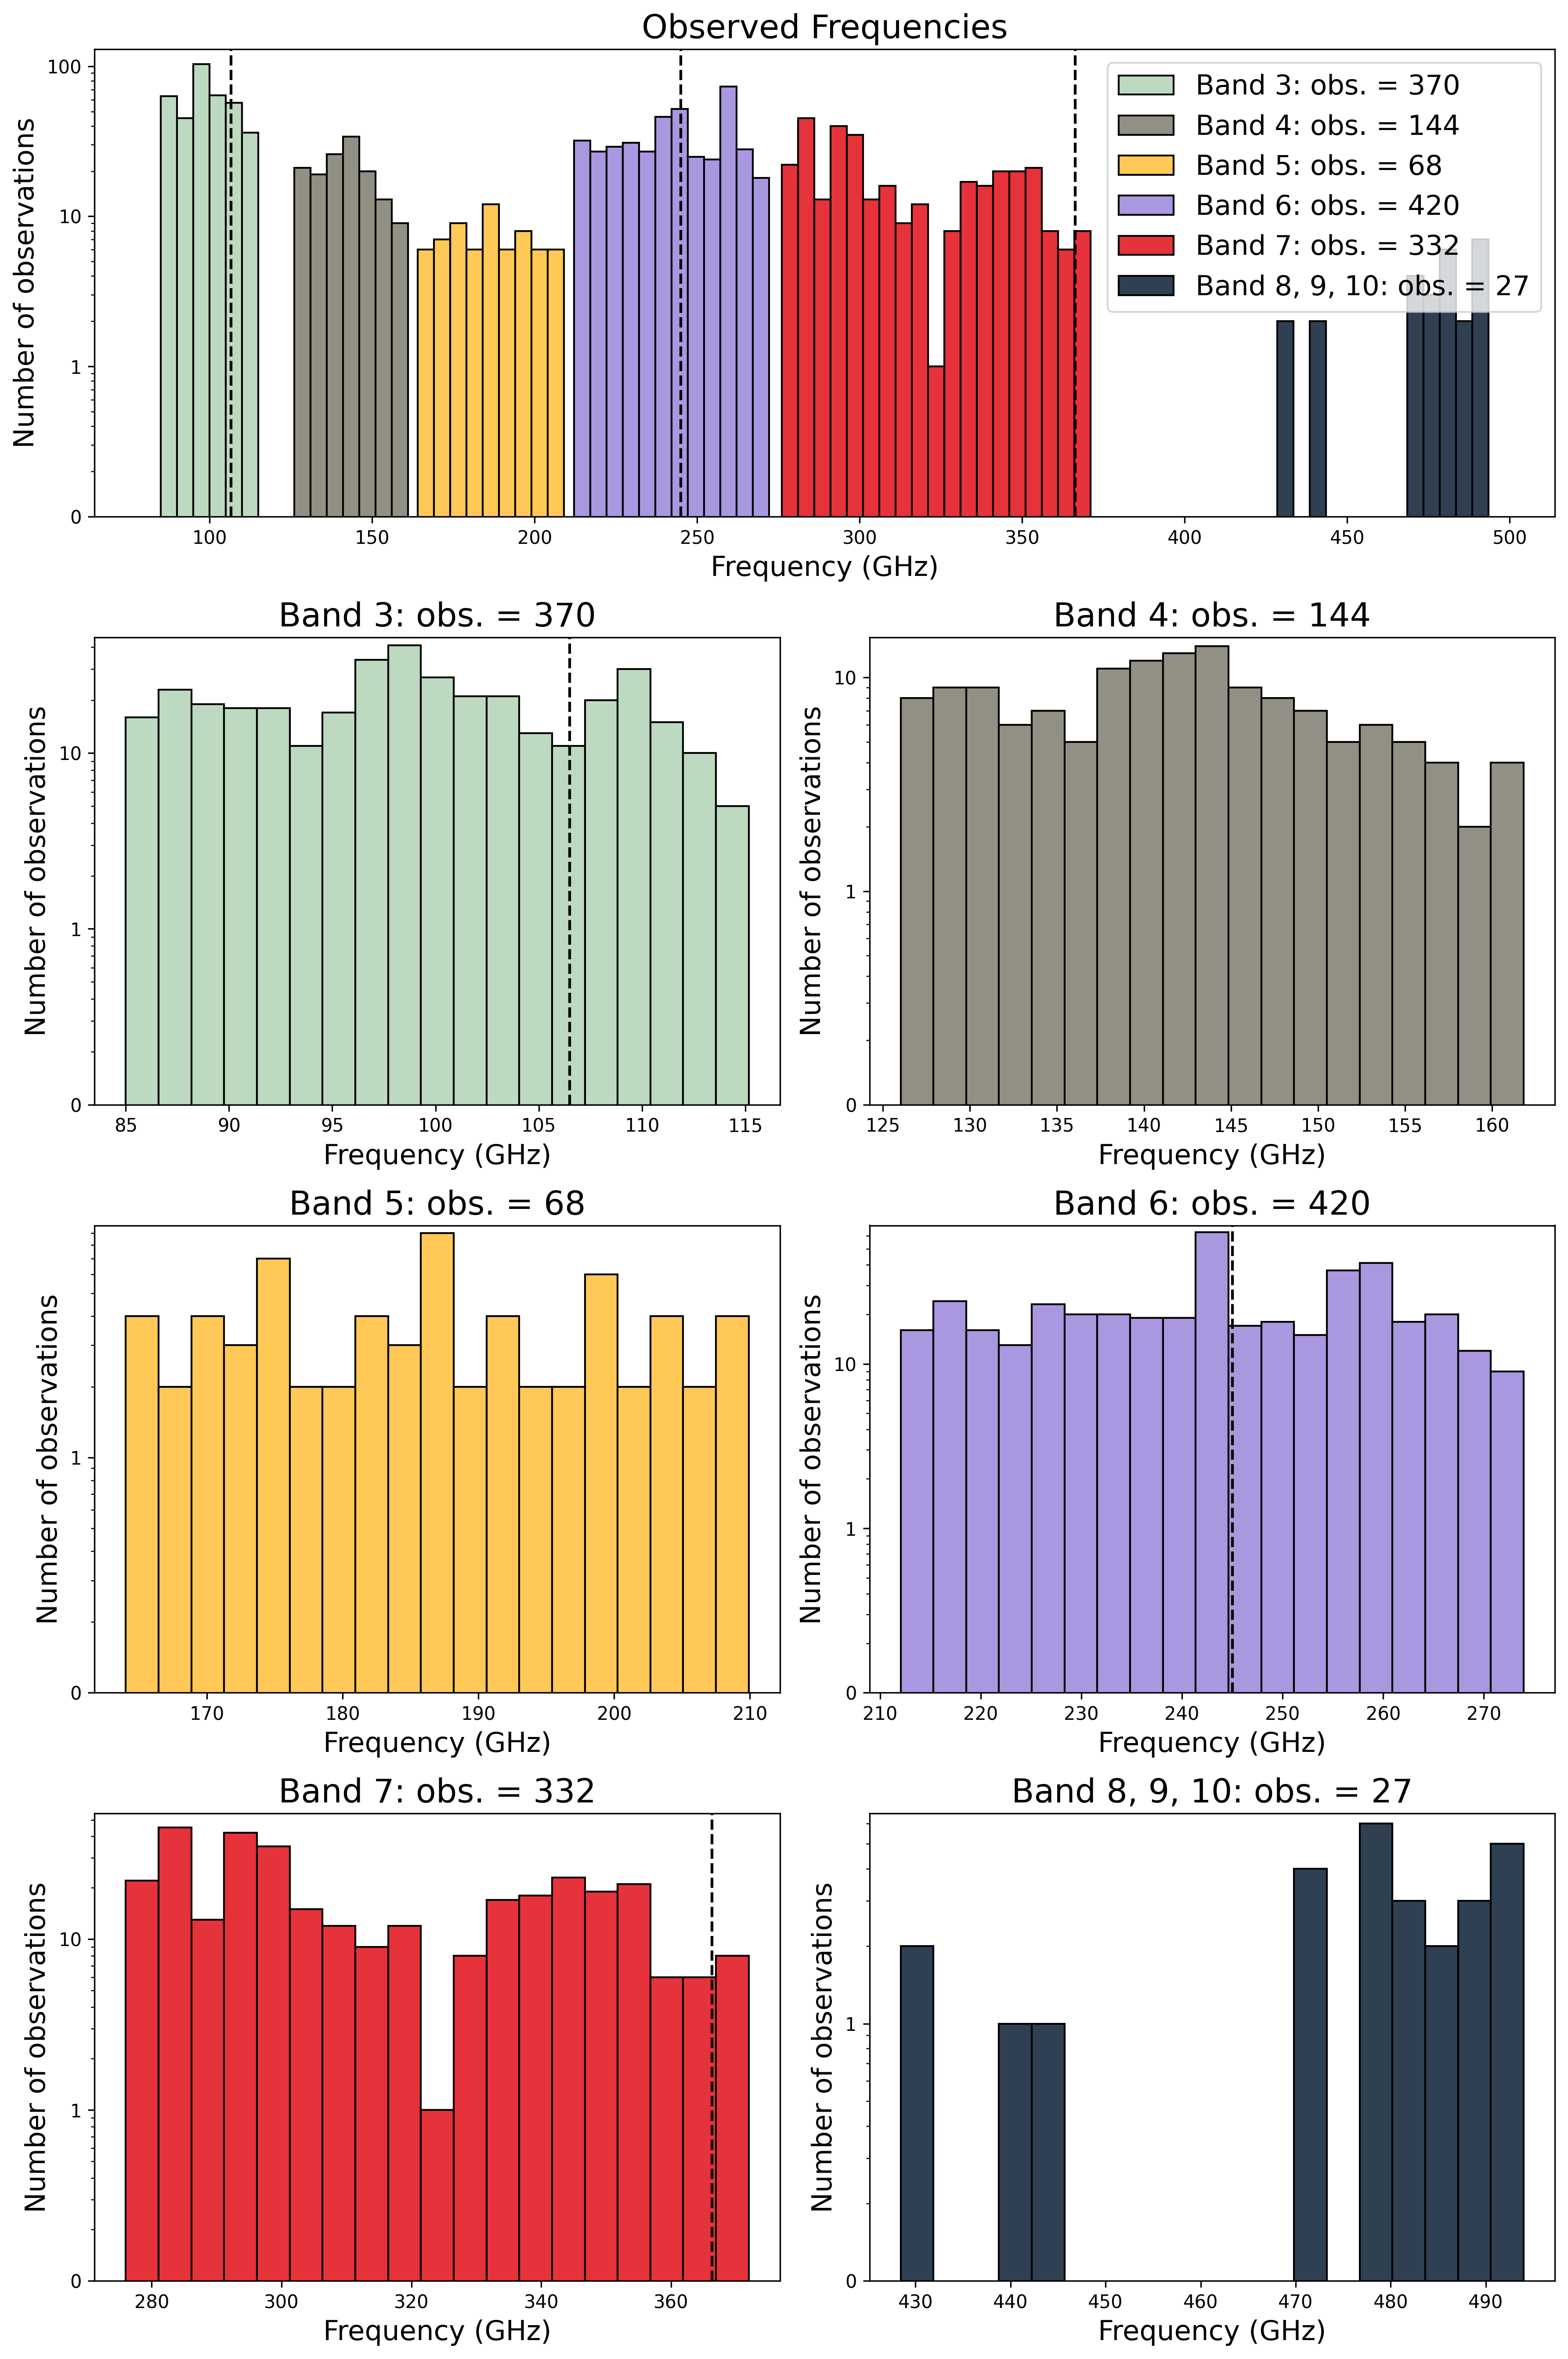

In [32]:
alminer.plot_bands(observations, mark_freq=[106.5, 245.0, 366.3])

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `plot_observations`</span>
<br>

## 3.4 Plot observed frequencies in each band <a name="plot_observations"></a>

The `alminer.plot_observations` function creates a detailed plot of <span style="color:#ff7d72"><b>observations in each band</b></span> showing the <span style="color:#ff7d72"><b>exact observed frequency ranges</b></span>. 

<u>*Note*</u>: Observation numbers are the input DataFrame's index values. 

### Example 3.4.1: plot observed frequencies in each band and mark CO lines

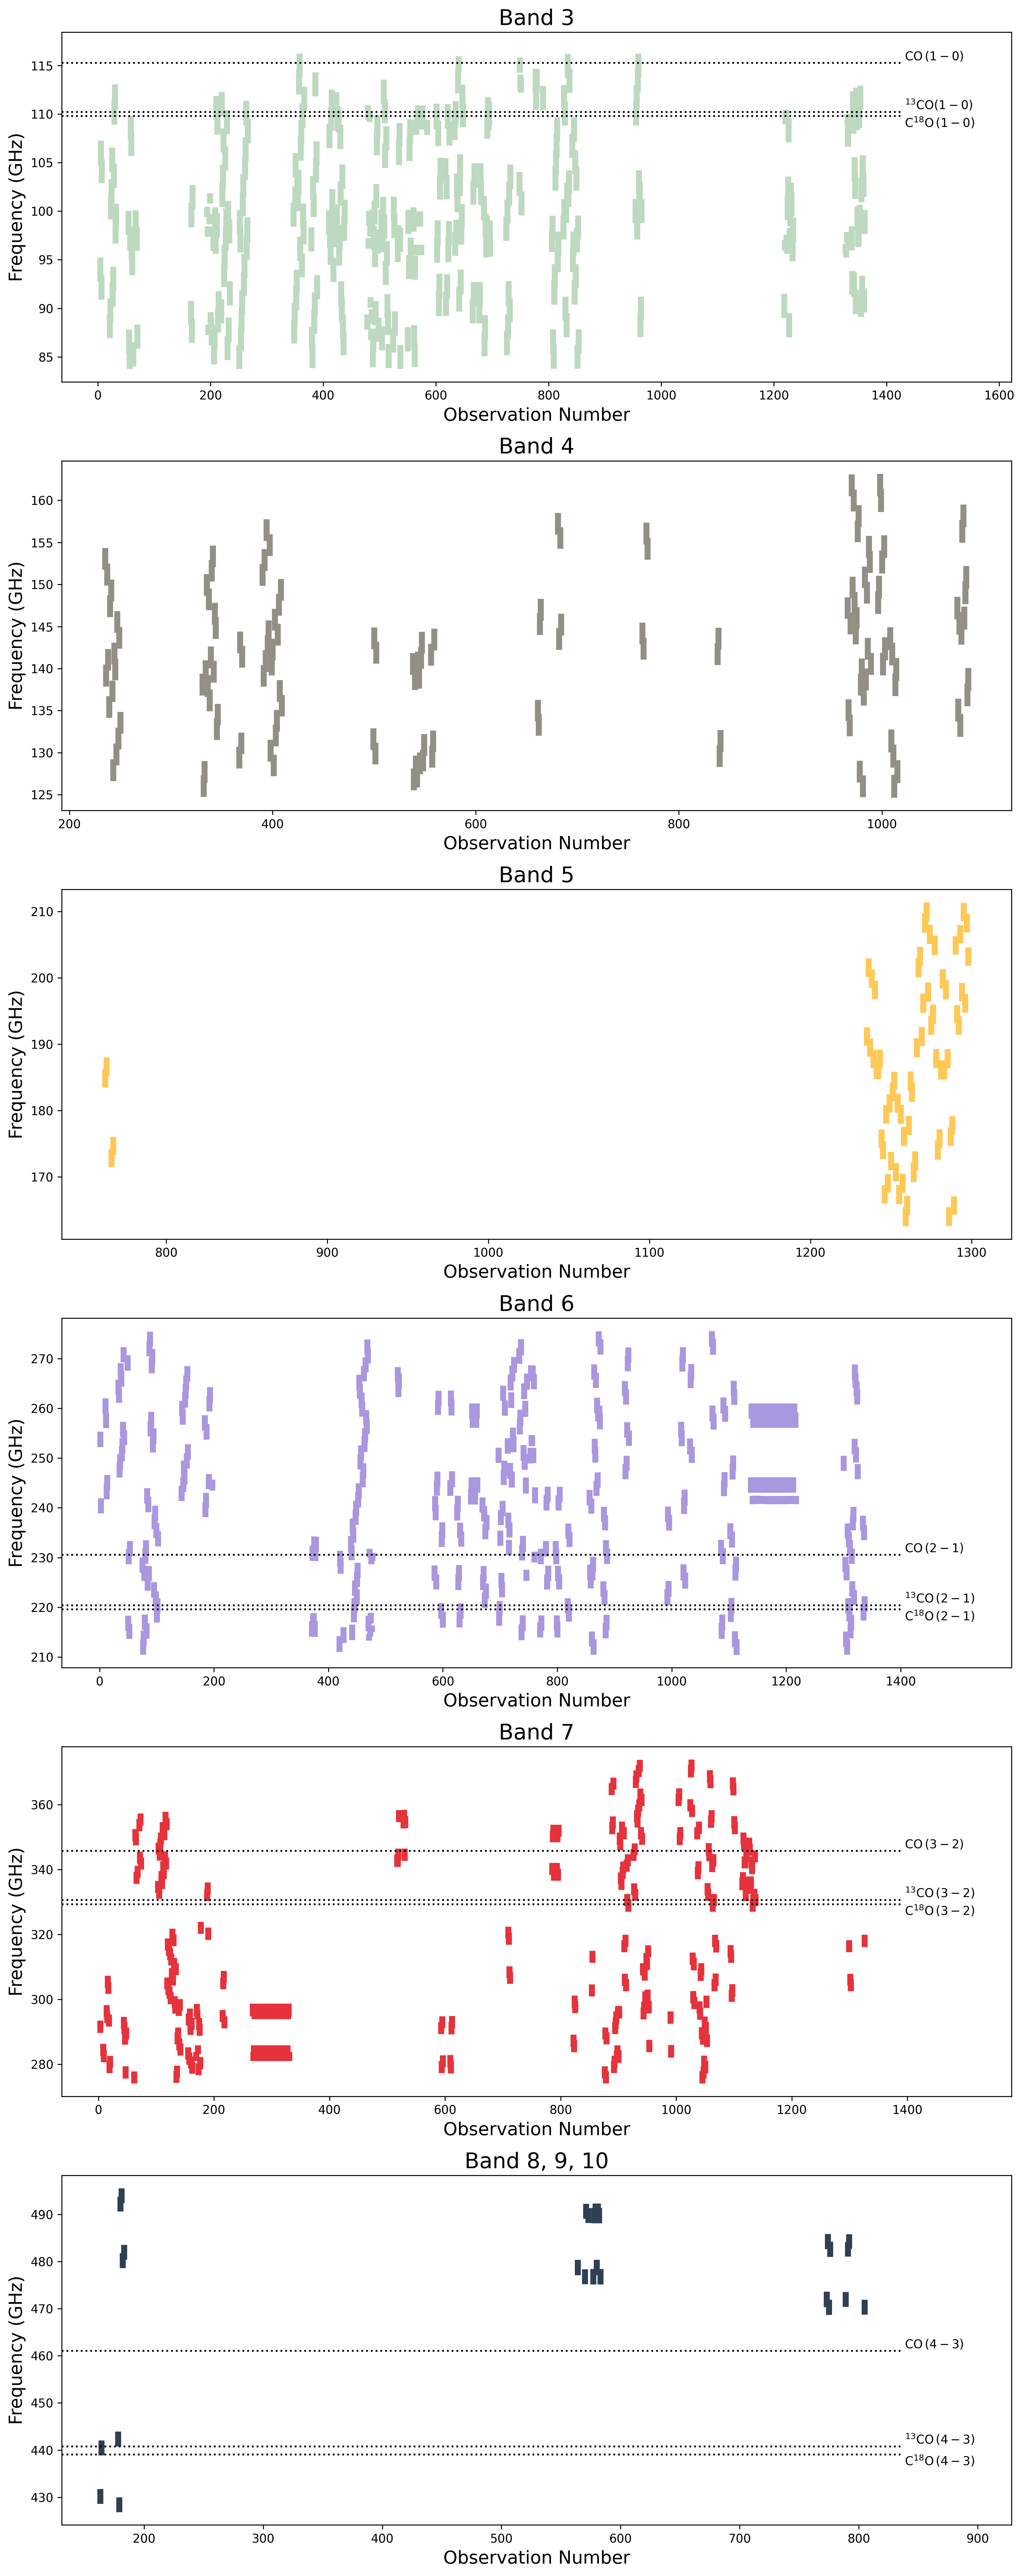

In [33]:
alminer.plot_observations(observations, mark_CO=True)

### Example 3.4.2: plot observed frequencies and mark frequencies of choice

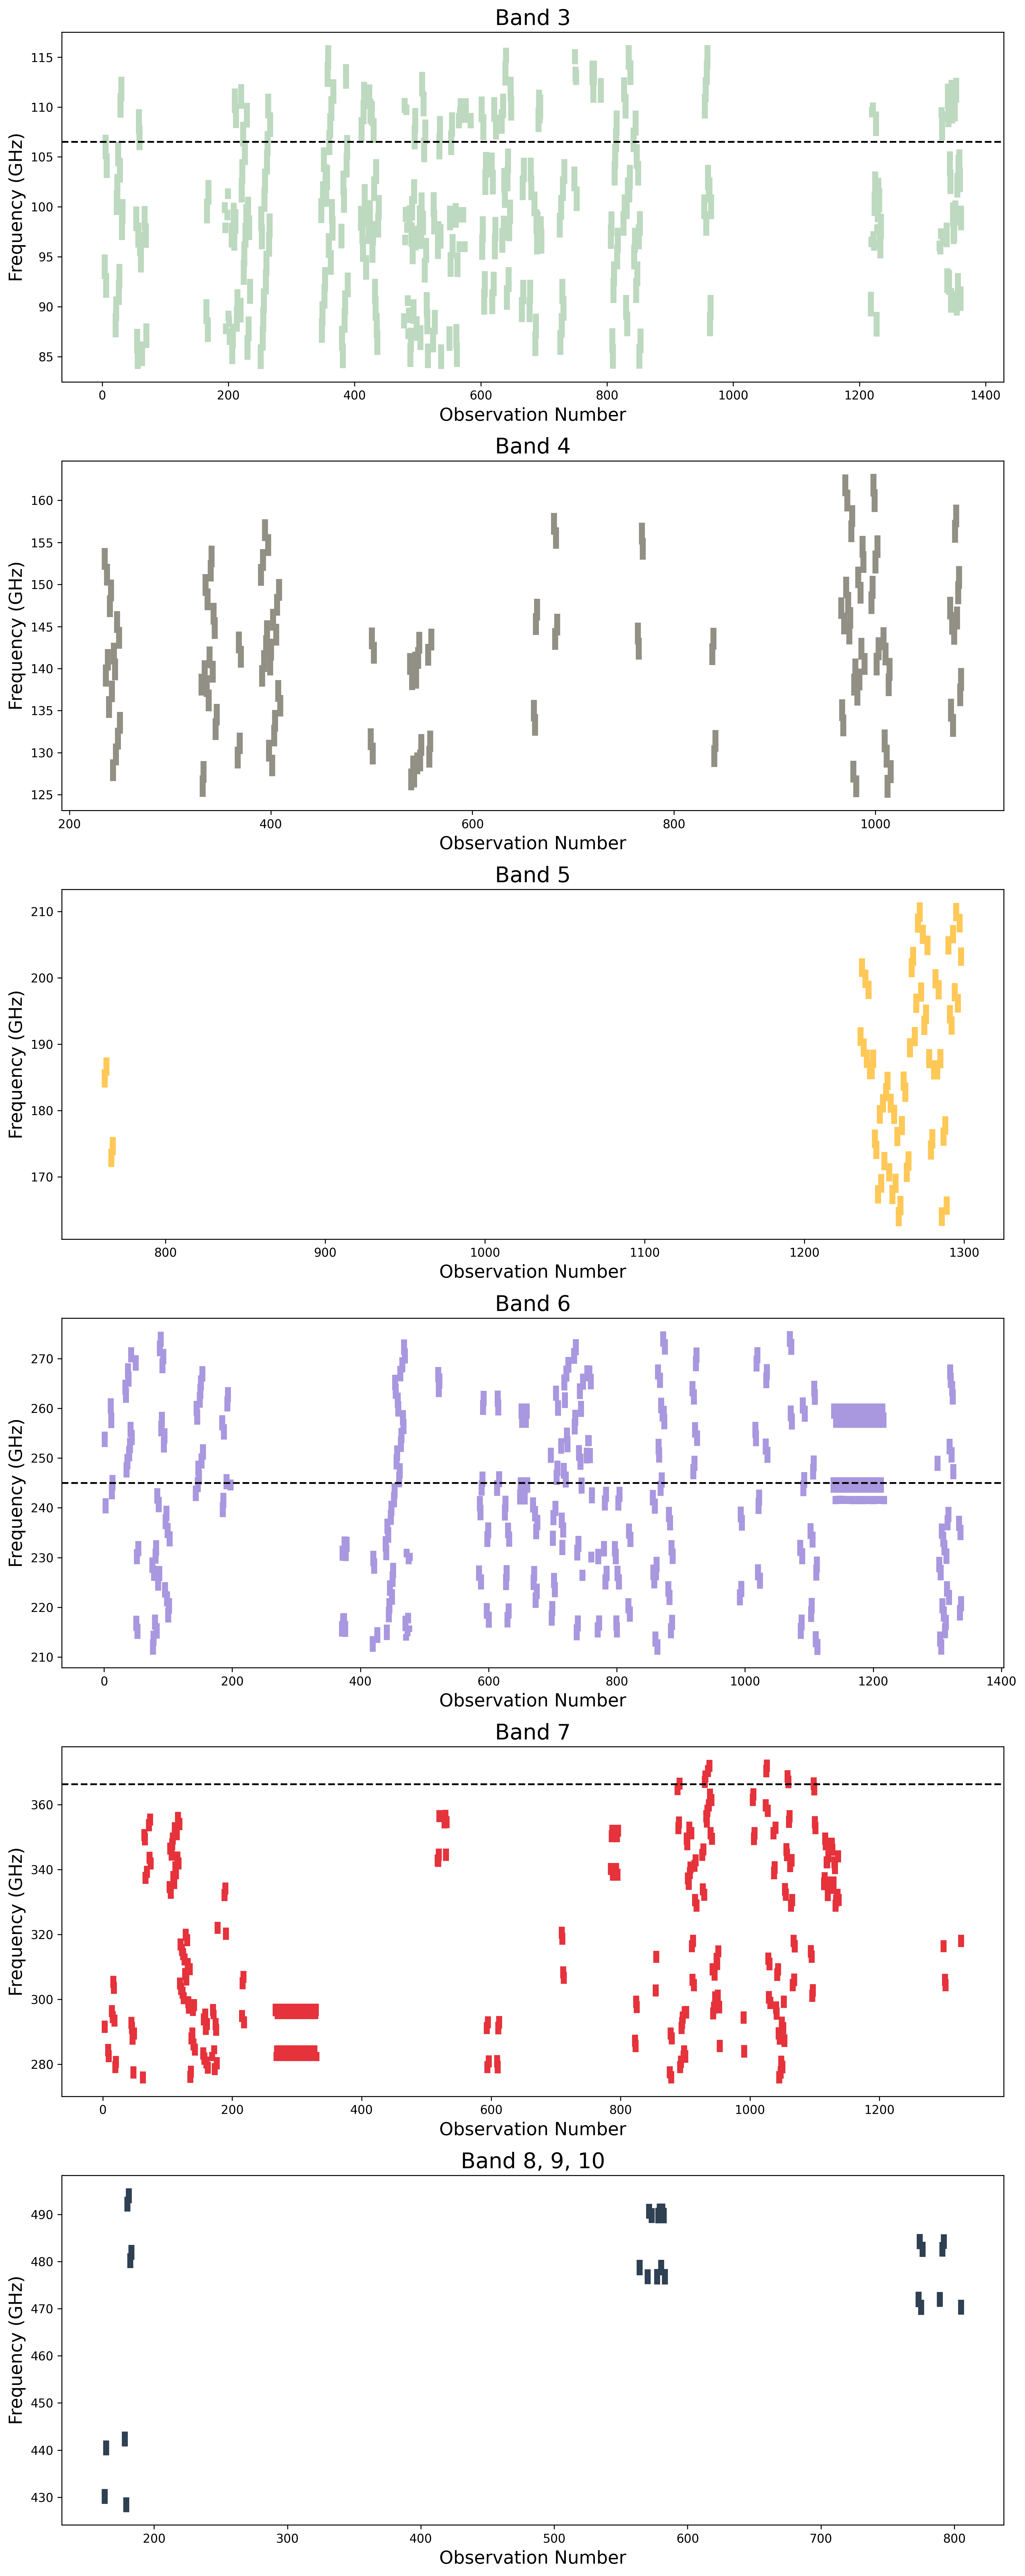

In [34]:
alminer.plot_observations(observations, mark_freq=[106.5, 245.0, 366.3])

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `plot_sky`</span>
<br>

## 3.5 Plot sky distribution <a name="plot_sky"></a>

The `alminer.plot_sky` function creates a plot of the <span style="color:#ff7d72"><b>distribution of targets on the sky</b></span>.

### Example 3.5.1: plot sky distribution

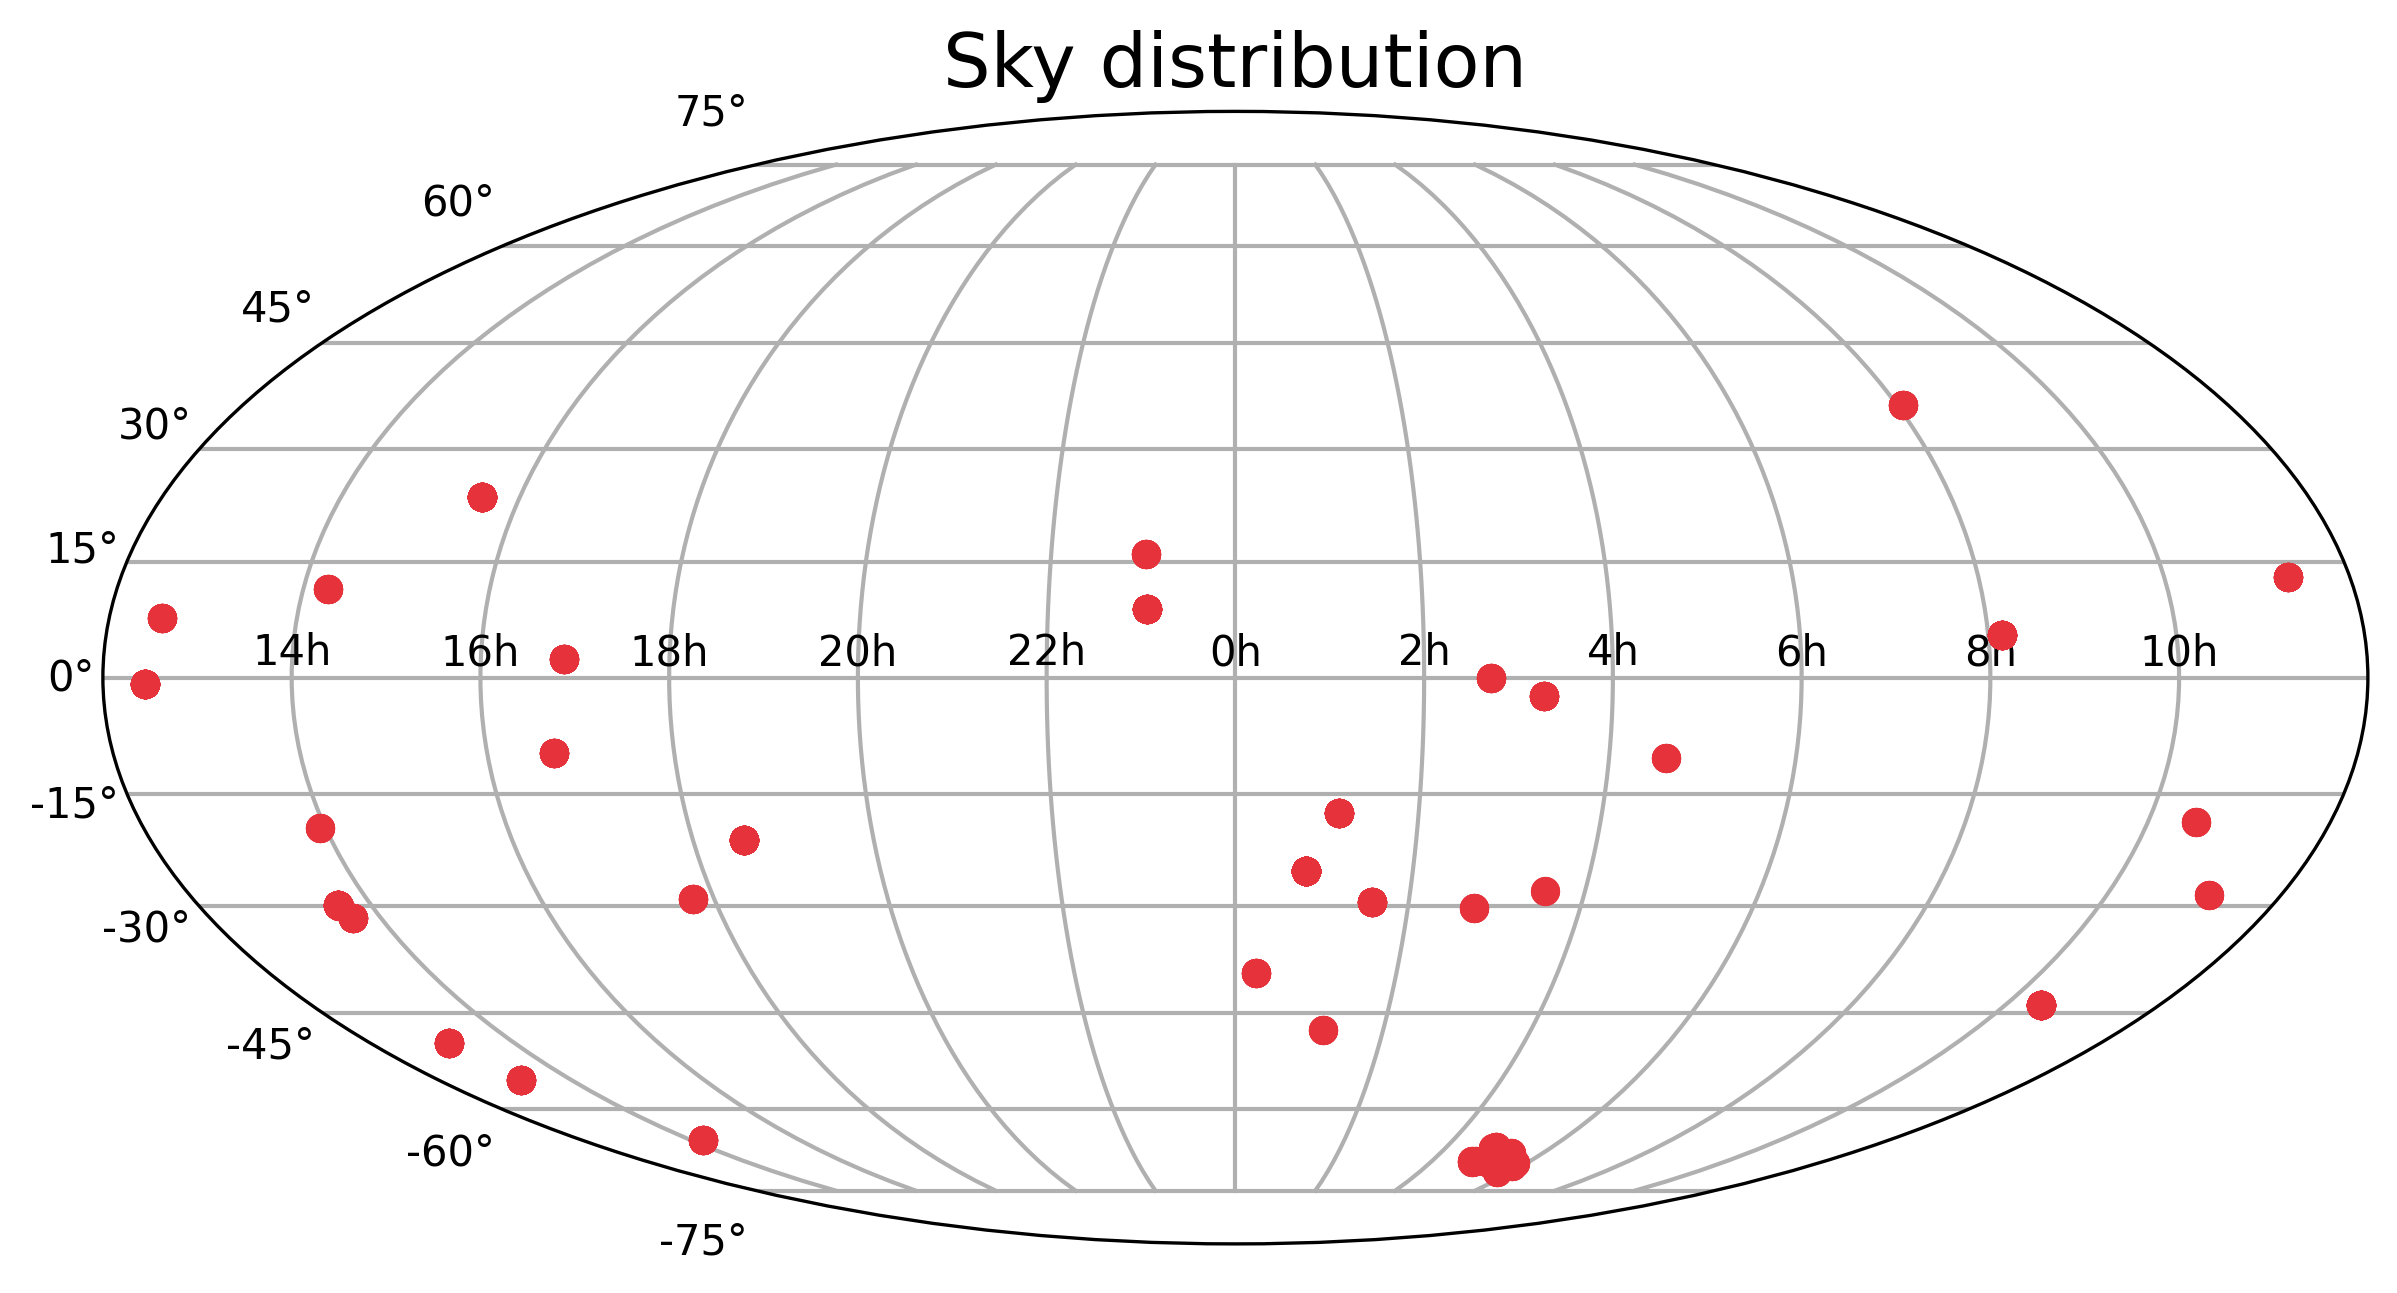

In [35]:
alminer.plot_sky(observations)

<img style="float: right; width:15%" src="images/step4.jpeg">

# 4. Create reports <a name="reports"></a>

### This section introduces different ways to save query results:<br>

* [4.1 - Export results as a table](#save_table)<br>
* [4.2 - Save overview plots for each target](#save_source_reports)<br>



<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `save_table`</span>

## 4.1 Export results as a table <a name="save_table"></a>

The `alminer.save_table` function writes the provided DataFrame to a <span style="color:#ff7d72"><b>table in CSV format</b></span> in the 'tables' folder within the current working directory. 

<u>*Note*</u>: If the 'tables' folder does not exist, it will be created.

### Example 4.1.1: save query results as a table

In [36]:
alminer.save_table(observations, filename="galaxy_chemistry")

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `save_source_reports`</span>

## 4.2 Save overview plots <a name="save_source_reports"></a>

The `alminer.save_source_reports` function creates <span style="color:#ff7d72"><b>overview plots</b></span> of observed frequencies, angular resolution, LAS, frequency and velocity resolutions <span style="color:#ff7d72"><b>for each source</b></span> in the provided DataFrame and saves them in PDF format in the 'reports' folder in the current working directory. 

<u>*Notes*</u>: 
* If the 'reports' folder does not exist, it will be created. 
* The reports are named after the target names. 
* Currently, the grouping is done based on ALMA target names, so the same source with a slightly different naming schemes will be treated as separate targets.

### Example 4.2.1: save overview plots of each target with CO lines marked

Let's first narrow down our large query to a smaller subset to only a range of frequencies (Band 3) and angular resolutions < 0.5":

In [37]:
selected = observations[(observations["min_freq_GHz"] > 80.0) & 
                        (observations["max_freq_GHz"] < 115.0) & 
                        (observations["ang_res_arcsec"] < 0.5)]
alminer.summary(selected)

--------------------------------
Number of projects = 8
Number of observations = 21
Number of unique subbands = 81
Total number of subbands = 81
8 target(s) with ALMA data = ['NGC7469', 'NGC1266', 'Arp220', 'ngc6240', 'IRAS_F16399-0937', 'n613', 'NGC4418', 'Cloverleaf']
--------------------------------


Now we can create and save plots for each source, with CO and its isotopologues marked:

In [38]:
alminer.save_source_reports(selected, mark_CO=True)

<span style="float: right; border-style: solid; padding: 10px; border-width: 2px; text-align:right"><b>Function:</b> `download_data`</span>

# 5. Download data <a name="download"></a>

<img style="float: right; width:25%" src="images/step5.jpeg">

The `alminer.download_data` function allows the user to <span style="color:#ff7d72"><b>download data</b></span> from the archive directly to a location on the local disk. 

### General notes about the download function:
 * The desired location can be changed -> set the <span style="color:#63a5f2">*location*</span> parameter to the desired path
  * default location: 'data' subdirectory in the current working directory
 * To check the amount of disk space needed first before downloading -> set <span style="color:#63a5f2">*dryrun=True*</span> 
 * By default, tar files (*raw* + *FITS*) associated with uids in the provided DataFrame will be downloaded
  * To download only the FITS data products -> set <span style="color:#63a5f2">*fitsonly=True*</span>
 * It is possible to provide a list of strings to the <span style="color:#63a5f2">*filename_must_include*</span> parameter, that the user wants to be included in the filenames that are downloaded
  * The choice is largely dependent on the cycle and type of reduction that was performed, and data products that exist on the archive as a result (e.g. primary beam corrected: '.pbcor', the science target: '_sci' or the ALMA target name)
 * A list of URLs (files) to be downloaded from the archive can be printed to the terminal by setting <span style="color:#63a5f2">*print_urls=True*</span>

In [39]:
# This step is not necessary, but currently pyvo.dal.query contains 
# an Astropy deprecation warning that we prefer to ignore
import warnings
warnings.filterwarnings("ignore") 

### Example 5.1: download all data products (raw + products)

In [40]:
alminer.download_data(selected, fitsonly=False, dryrun=True, location='./data', print_urls=False)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 21
Selected Member OUSs: ['uid://A002/X6444ba/X17d', 'uid://A001/X121/X3d2', 'uid://A001/X121/X3d8', 'uid://A001/X121/X3d5', 'uid://A001/X121/X3cf', 'uid://A001/X2fe/Xcce', 'uid://A001/X2fe/Xcd2', 'uid://A001/X2fe/Xcde', 'uid://A001/X2fe/Xcd6', 'uid://A001/X2fe/Xcda', 'uid://A001/X2fe/X728', 'uid://A001/X2fe/X724', 'uid://A001/X2fe/X734', 'uid://A001/X2fe/X738', 'uid://A001/X5a4/X155', 'uid://A001/X87d/X1fb', 'uid://A001/X87d/X1f5', 'uid://A001/X87d/X207', 'uid://A001/X1290/X17', 'uid://A001/X1288/X6c2', 'uid://A001/X1288/X6be']
Number of files to download = 115
Needed disk space = 4.1 TB
--------------------------------


### Example 5.2: download only continuum FITS images for the science target

In [41]:
alminer.download_data(selected, fitsonly=True, dryrun=True, location='./data', 
                 filename_must_include=['_sci', '.pbcor', 'cont'], print_urls=True)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 21
Selected Member OUSs: ['uid://A002/X6444ba/X17d', 'uid://A001/X121/X3d2', 'uid://A001/X121/X3d8', 'uid://A001/X121/X3d5', 'uid://A001/X121/X3cf', 'uid://A001/X2fe/Xcce', 'uid://A001/X2fe/Xcd2', 'uid://A001/X2fe/Xcde', 'uid://A001/X2fe/Xcd6', 'uid://A001/X2fe/Xcda', 'uid://A001/X2fe/X728', 'uid://A001/X2fe/X724', 'uid://A001/X2fe/X734', 'uid://A001/X2fe/X738', 'uid://A001/X5a4/X155', 'uid://A001/X87d/X1fb', 'uid://A001/X87d/X1f5', 'uid://A001/X87d/X207', 'uid://A001/X1290/X17', 'uid://A001/X1288/X6c2', 'uid://A001/X1288/X6be']
Number of files to download = 19
Needed disk space = 303.7 MB
File URLs to download = https://almascience.eso.org/dataPortal/member.uid___A001_X2fe_Xcda.Arp220_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits
https://almascience.eso.org/dataPortal/member.uid___A001_X2fe_Xcda.Arp220_sci.spw25_27_29_31.cont.I.tt1.pbcor.fits
https://almascience.eso.o

# ALminer resources

 * **Documentation: https://alminer.readthedocs.io/** (especially the [API](https://alminer.readthedocs.io/en/latest/pages/api.html))
 
 * **For updates, check out our GitHub page: https://github.com/emerge-erc/ALminer**

 
# Acknowledgements

If you use ALminer as part of your research, please <span style="color:#ff7d72"><b>consider citing us</b></span> (ADS reference will be added to the Github page when available).

We acknowledge the work of Leiden University M.Sc. students, Robin Mentel and David van Dop, who contributed to early versions of this work.

# Contact us!

If you encounter any issues or have questions, you can e-mail us or better yet, use [GitHub's issue tracker](https://github.com/emerge-erc/ALminer/issues).

If you have suggestions for improvement or would like to collaborate with us on this project, please e-mail [Aida Ahmadi](mailto:aahmadi@strw.leidenuniv.nl) and [Alvaro Hacar](mailto:alvaro.hacar@univie.ac.at).

# <span style="color:#ff7d72">Thanks for using ALminer and happy mining =)</span>